In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations
from operator import itemgetter

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
def barplot_nodes(graph,centrality, centrality_name, pos):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
    fig.suptitle(centrality_name + ' Centrality barplot and nodes highlights')

    #barplot
    x=[]
    y=[]
    cent_sorted = {}
    labels = {}

    centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
    for nodi in centrality:
        cent_sorted.update({nodi[0]: nodi[1]})
    centrality = cent_sorted
    for key, value in cent_sorted.items():
        if len(x) < 10:
            x.append(key)
            y.append(value)
            labels[key]=key
    plt.figure(figsize=(15,10))
    sns.barplot(x=x, y=y, ax=ax1)


    #ottenimento dei colori
    col = []
    x_values = ax1.get_xticklabels()
    x_values = [x.get_text() for x in x_values]
    for i in range(0, len(ax1.patches)):
        colori = []
        colori = list(ax1.patches[i].get_facecolor())
        colori.append(x_values[i])
        col.append(colori)
    
    dizionario_colori = {}
    for colori in col:
        color_HEX = "#" + hex(int(colori[0]*255))[2:].zfill(2) + hex(int(colori[1]*255))[2:].zfill(2) + hex(int(colori[2]*255))[2:].zfill(2)
        dizionario_colori.update({colori[4]: color_HEX})
    print(dizionario_colori)



    #aggiunta nodi colorati in base al barplot
    plt.figure(figsize=(12,8))
    #pos_sample = nx.kamada_kawai_layout(graph)
    pos_sample = pos
    nx.draw(graph, pos_sample, ax=ax2, with_labels = False)
    nx.draw_networkx_nodes(graph, pos_sample, ax=ax2, nodelist=list(dizionario_colori.keys()), node_color=list(dizionario_colori.values()))
    plt.show()

    return dizionario_colori

In [4]:
def important_node_centrality_plot(centrality, df_edge, dizionario_colori):
    x=[]
    y=[]
    cent_sorted = {}
    labels = {}

    centrality = sorted(centrality.items(), key=lambda x:x[1], reverse=True)
    for nodi in centrality:
        cent_sorted.update({nodi[0]: nodi[1]})
    centrality = cent_sorted
    for key, value in cent_sorted.items():
        if len(x) < 10:
            x.append(key)
            y.append(value)
            labels[key]=key
    
    nodes = labels
    edges = []

    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))

    graph_deg = nx.DiGraph()
    graph_deg.add_edges_from(edges)
    graph_deg.add_nodes_from(nodes)
    pos_deg = nx.kamada_kawai_layout(graph_deg)

    plt.figure(figsize=(12,8))
    nx.draw(graph_deg, pos_deg, node_size=1000, nodelist=list(dizionario_colori.keys()), with_labels = False, node_color=list(dizionario_colori.values())) 
    nx.draw_networkx_labels(graph_deg, pos_deg, labels)
    plt.show()

In [5]:
df_edge = pd.read_csv('twitch\DE\musae_DE_edges_username.csv')
df_target = pd.read_csv('twitch\DE\musae_DE_target.csv')

In [6]:
#Caricamento del grafo orientato
edges = list(zip(df_edge["from"],df_edge["to"]))
nodes = df_target["username"]

In [7]:
graph = nx.Graph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.kamada_kawai_layout(graph)

### Analisi descrittiva

In [8]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
print("RAGGIO: ", nx.radius(graph))
print("DIAMETRO: ", nx.diameter(graph))
print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  9498
EDGES:  153138
DENSITY:  0.003
CLUSTERING:  0.2008857266932269
RAGGIO:  4
DIAMETRO:  7
IS_CONNECTED:  True


In [9]:
nx.clustering(graph)

{'pinhead_01': 0.5238095238095238,
 'rocketbeanstv': 0.007239245373708243,
 'gronkh': 0.006552587061510722,
 'pietsmiet': 0.013444668973900386,
 'royalphunk': 0.015867126071207705,
 'xpandorya': 0.015512000838486532,
 'ungespielt': 0.012919330822457739,
 'doktorfroid': 0.017044728971334477,
 'syntonum': 0.16477272727272727,
 'madbonzai': 0.195578231292517,
 'svenrge': 0.24285714285714285,
 'hollyrockt': 0.10543259557344065,
 'hubse': 0.16778846153846153,
 'detrax': 0.1038961038961039,
 'sulamith': 0.12380952380952381,
 'rodneyger': 0.18382352941176472,
 'gemmelrl': 0.17543859649122806,
 'rankiku': 0.11586452762923351,
 'voodooxgg': 0.1519774011299435,
 '5682': 0.3090909090909091,
 'masterzwerg1': 0.47058823529411764,
 '7668': 0.16279069767441862,
 'weichi_': 0.11212121212121212,
 'codeincan0': 0.15384615384615385,
 'nepmuck': 0.20338531254165002,
 'king_kasy': 0.13350340136054423,
 'solidoz': 0.06881720430107527,
 'zauberkindtv': 0.0969732588892154,
 'pabiohoh': 0.1548780487804878,
 'd

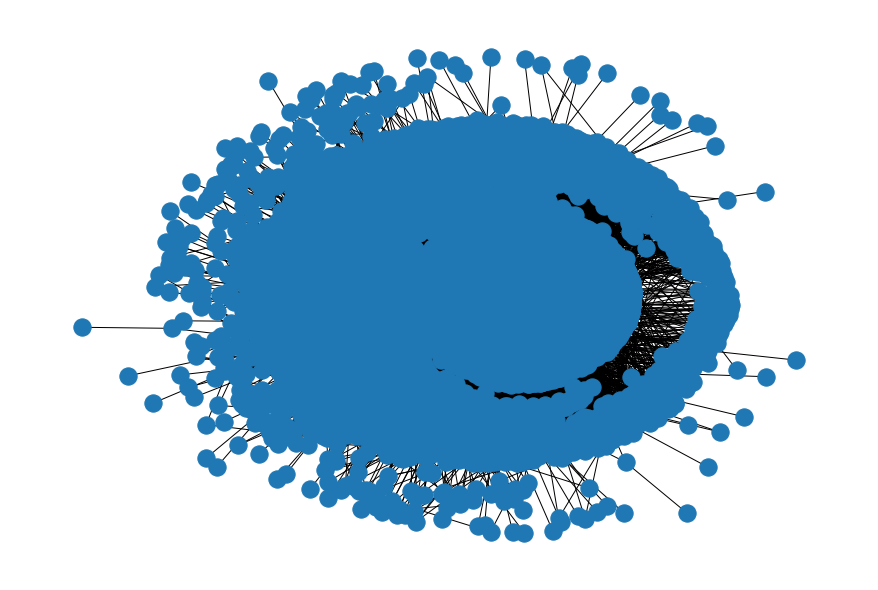

In [10]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1080x720 with 0 Axes>

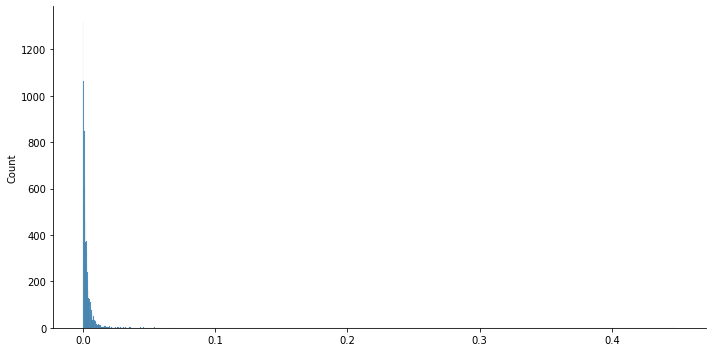

In [11]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

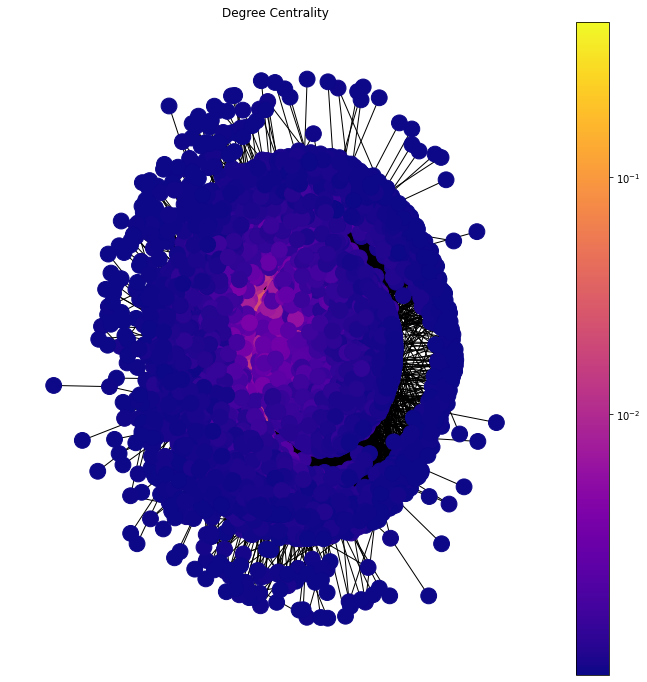

In [12]:
plt.figure(figsize=(12,12))
#pos = nx.kamada_kawai_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

{'gronkh': '#3173a1', 'rocketbeanstv': '#e0802c', 'royalphunk': '#3a913a', 'moondye7': '#c03c3d', 'laraloft': '#9371b2', 'shlorox': '#835b53', '8803': '#d584bc', 'thiseguy': '#7f7f7f', 'staiy': '#a8a935', 'lost': '#2dabb8'}


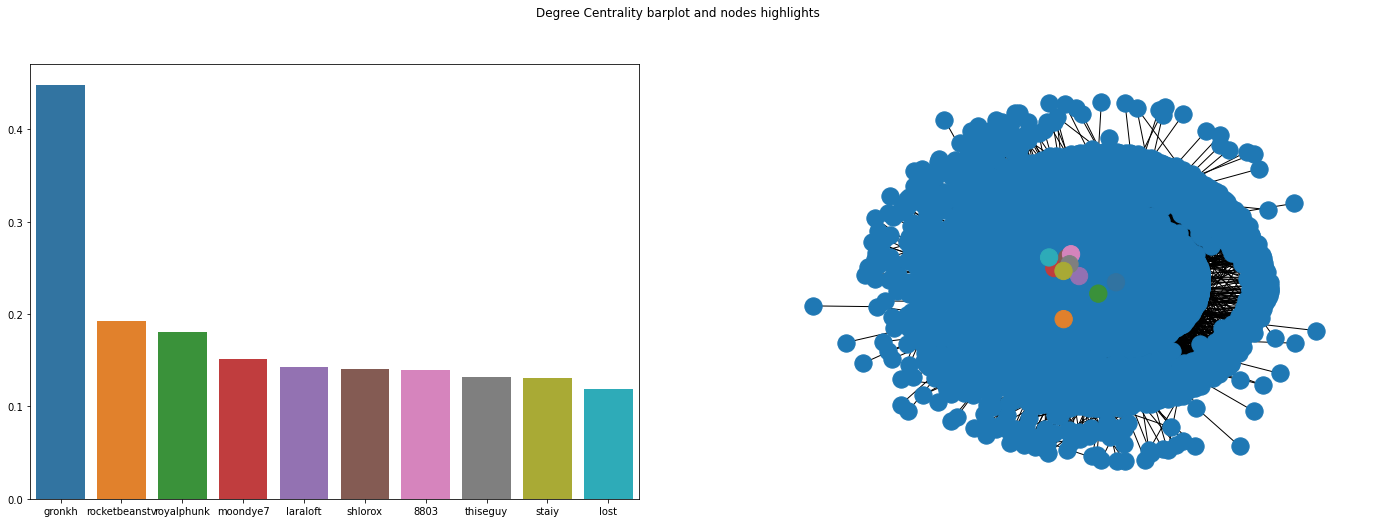

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [13]:
dizionario_colori = barplot_nodes(graph,degree, "Degree", pos)

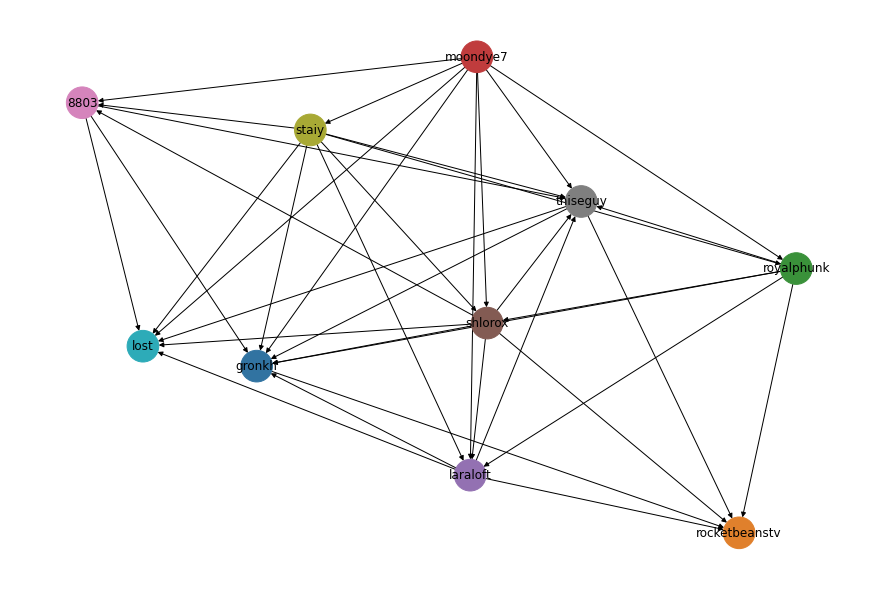

In [14]:
important_node_centrality_plot(degree, df_edge, dizionario_colori)

Betweenness Centrality

<Figure size 1080x720 with 0 Axes>

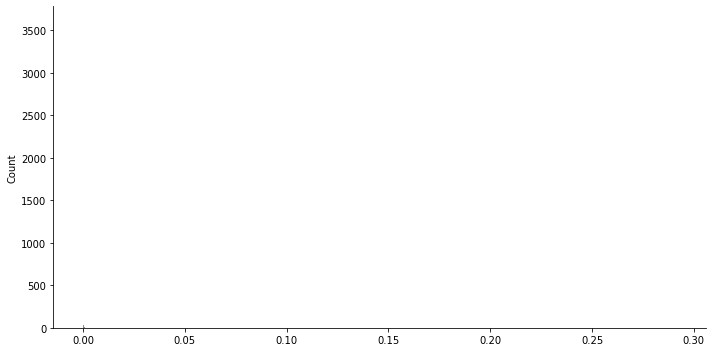

In [15]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

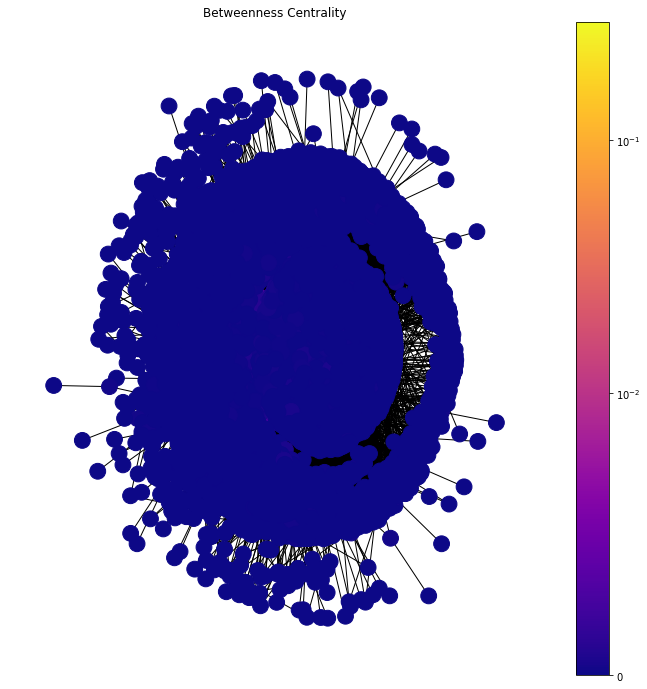

In [16]:
plt.figure(figsize=(12,12))
#pos = nx.kamada_kawai_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

{'gronkh': '#3173a1', 'rocketbeanstv': '#e0802c', 'royalphunk': '#3a913a', 'moondye7': '#c03c3d', 'laraloft': '#9371b2', '8803': '#835b53', 'shlorox': '#d584bc', 'summonersinnlive': '#7f7f7f', 'staiy': '#a8a935', 'lost': '#2dabb8'}


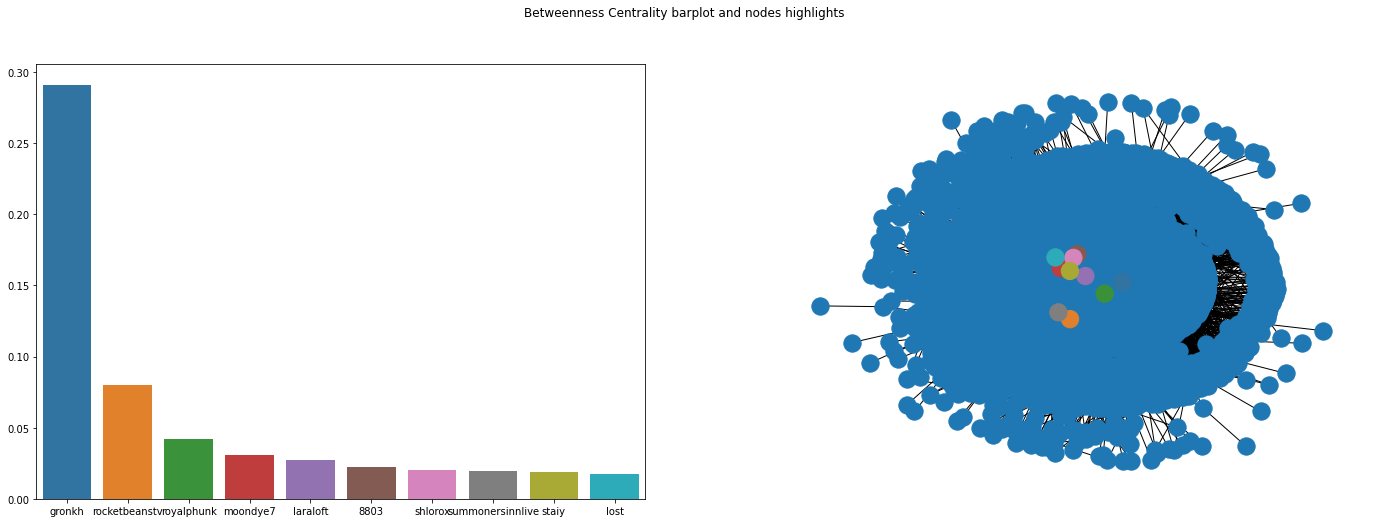

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [17]:
dizionario_colori = barplot_nodes(graph,bet, "Betweenness", pos)

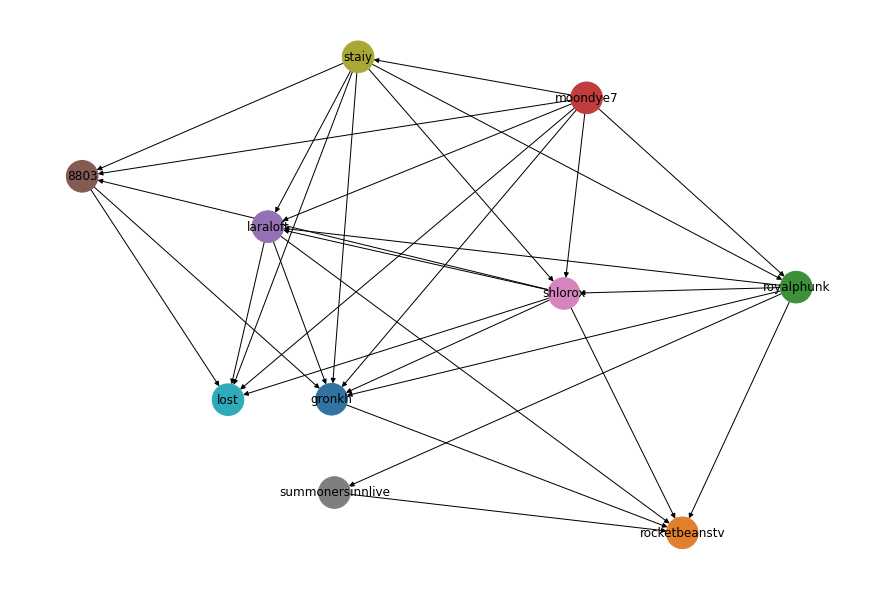

In [18]:
important_node_centrality_plot(bet, df_edge, dizionario_colori)

Closeness Centrality

<Figure size 1080x720 with 0 Axes>

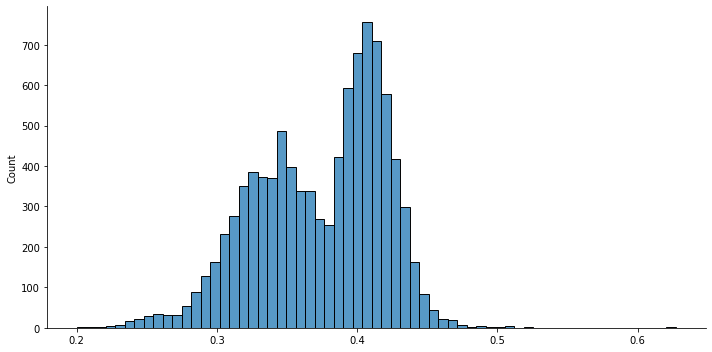

In [19]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

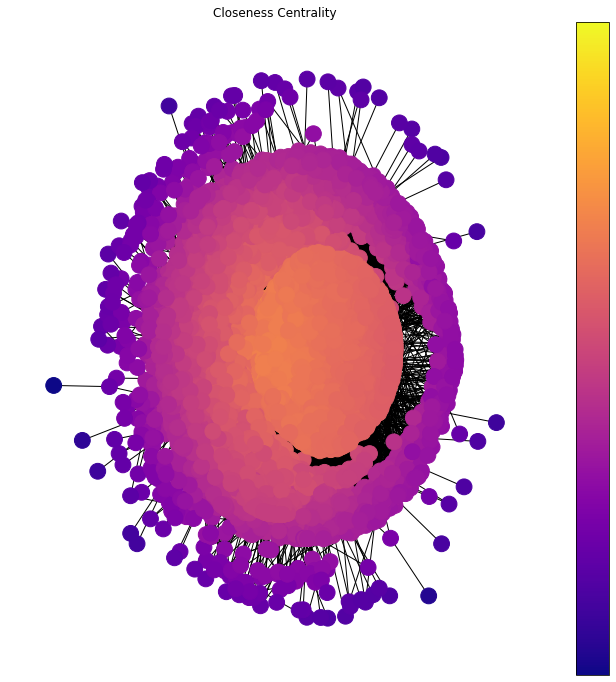

In [20]:
plt.figure(figsize=(12,12))
#pos = nx.kamada_kawai_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

{'gronkh': '#3173a1', 'rocketbeanstv': '#e0802c', 'royalphunk': '#3a913a', 'moondye7': '#c03c3d', 'laraloft': '#9371b2', 'thiseguy': '#835b53', 'shlorox': '#d584bc', 'staiy': '#7f7f7f', '8803': '#a8a935', 'biberbros': '#2dabb8'}


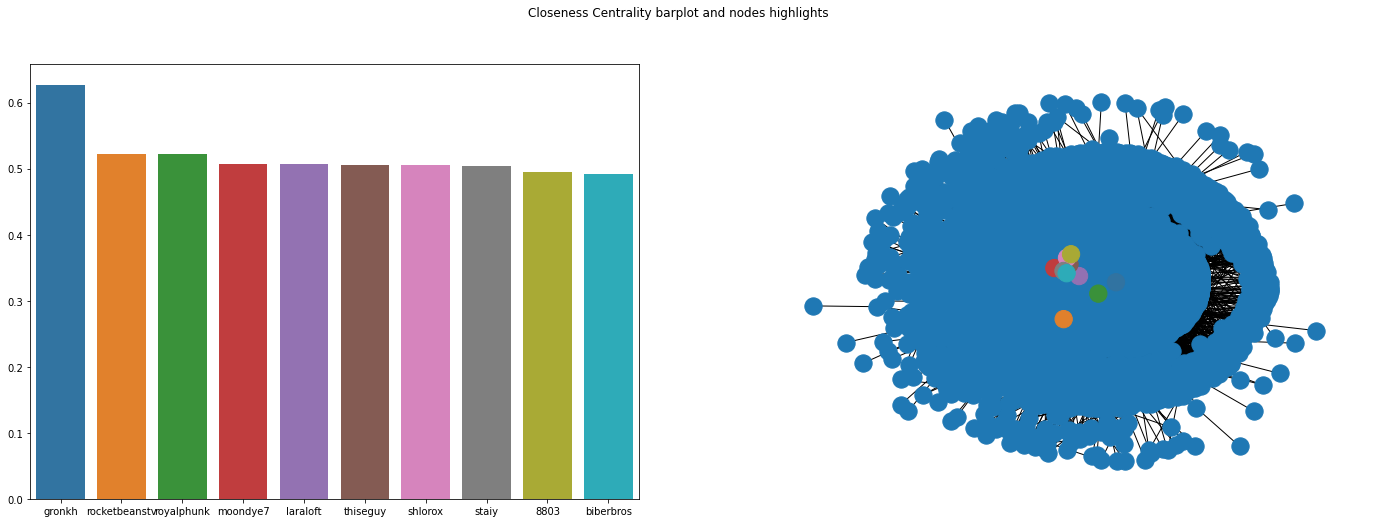

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [21]:
dizionario_colori = barplot_nodes(graph,clos, "Closeness", pos)

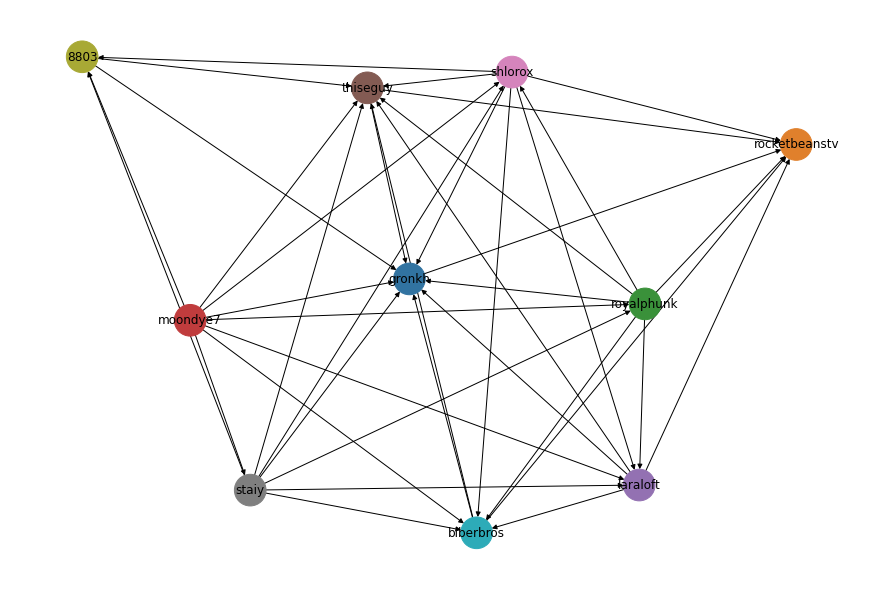

In [22]:
important_node_centrality_plot(clos, df_edge, dizionario_colori)

Eigenvector Centrality

C:\Users\mat98\AppData\Local\Temp\ipykernel_215308\1676484988.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot:ylabel='Density'>

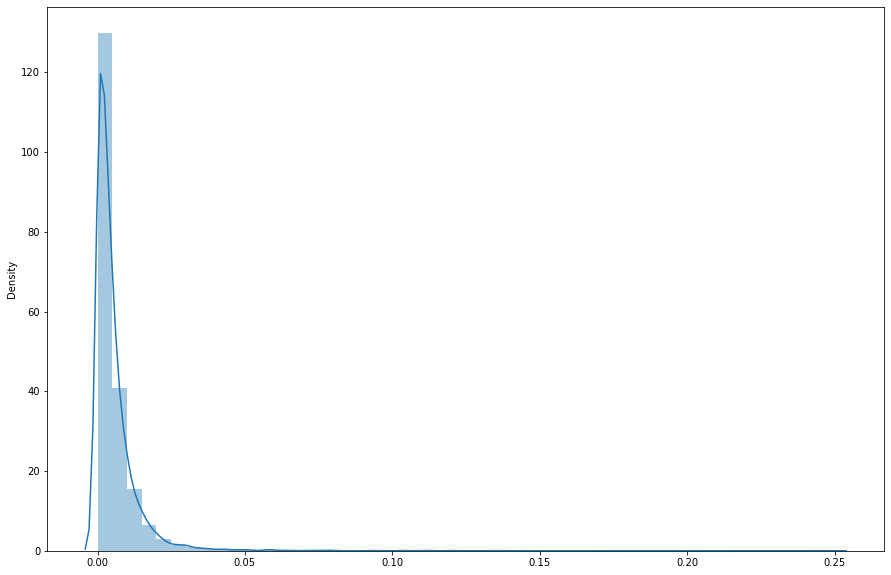

In [23]:
eigv = nx.eigenvector_centrality(graph, max_iter = 800)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

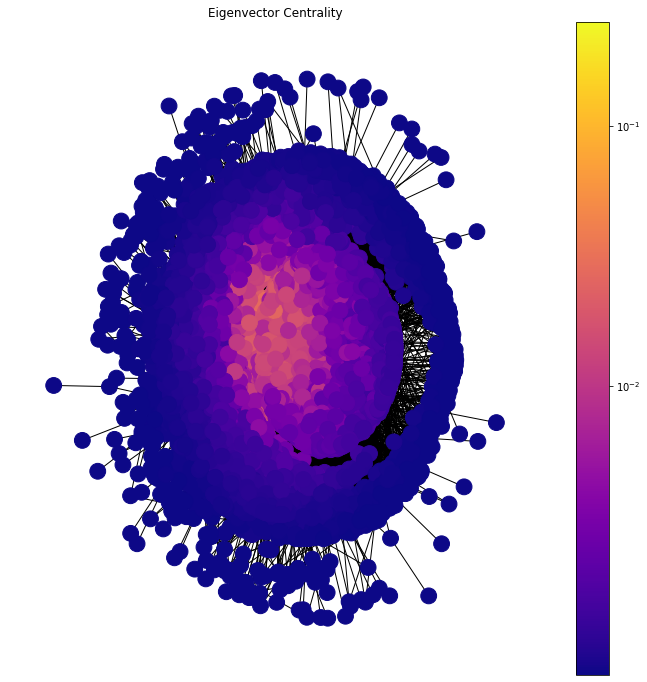

In [24]:
plt.figure(figsize=(12,12))
#pos = nx.kamada_kawai_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

{'gronkh': '#3173a1', 'thiseguy': '#e0802c', 'royalphunk': '#3a913a', 'shlorox': '#c03c3d', 'staiy': '#9371b2', 'moondye7': '#835b53', 'laraloft': '#d584bc', '8803': '#7f7f7f', 'hc_dizee': '#a8a935', 'tinkerleo': '#2dabb8'}


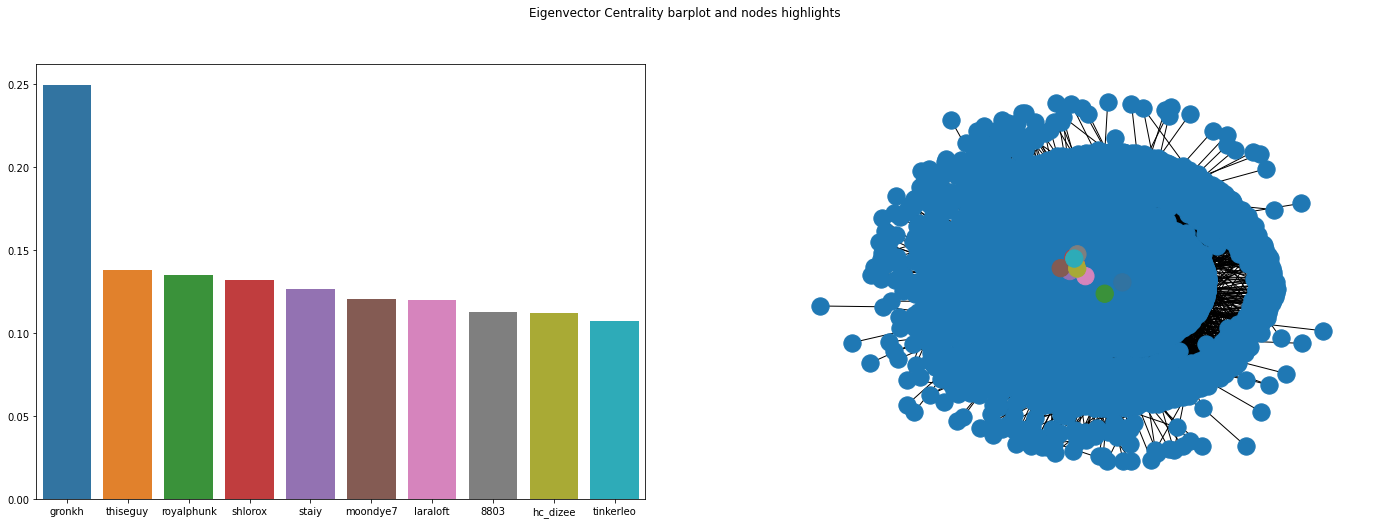

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [25]:
dizionario_colori = barplot_nodes(graph,eigv, "Eigenvector", pos)

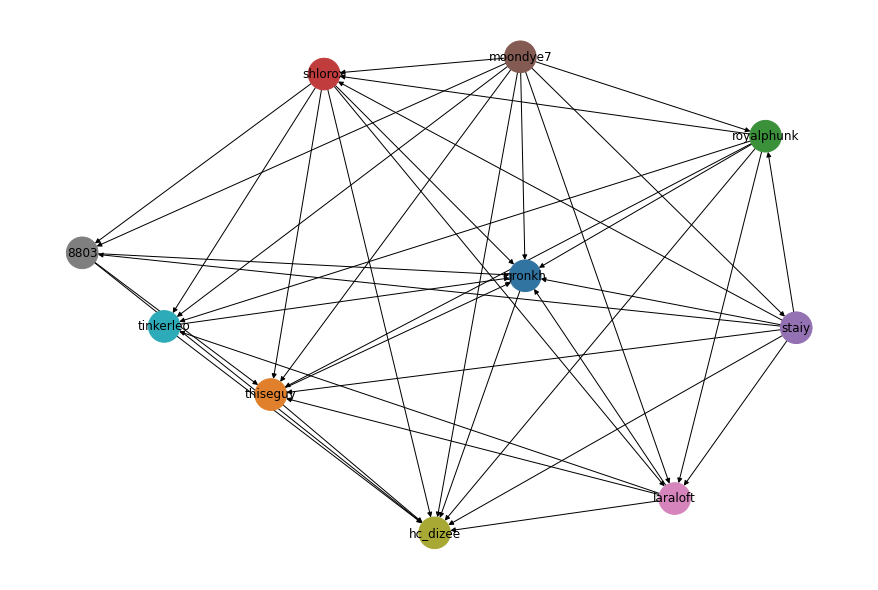

In [26]:
important_node_centrality_plot(eigv, df_edge, dizionario_colori)

PageRank

<Figure size 1080x720 with 0 Axes>

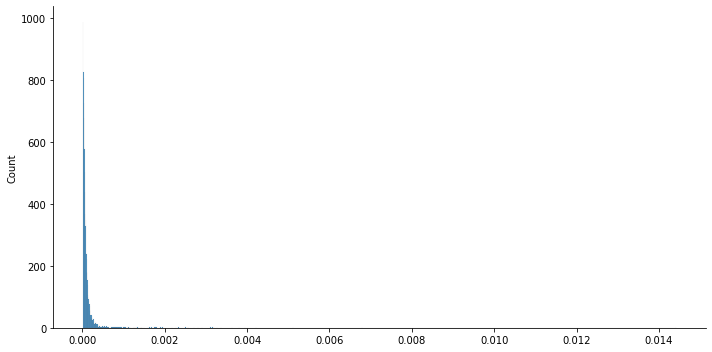

In [27]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

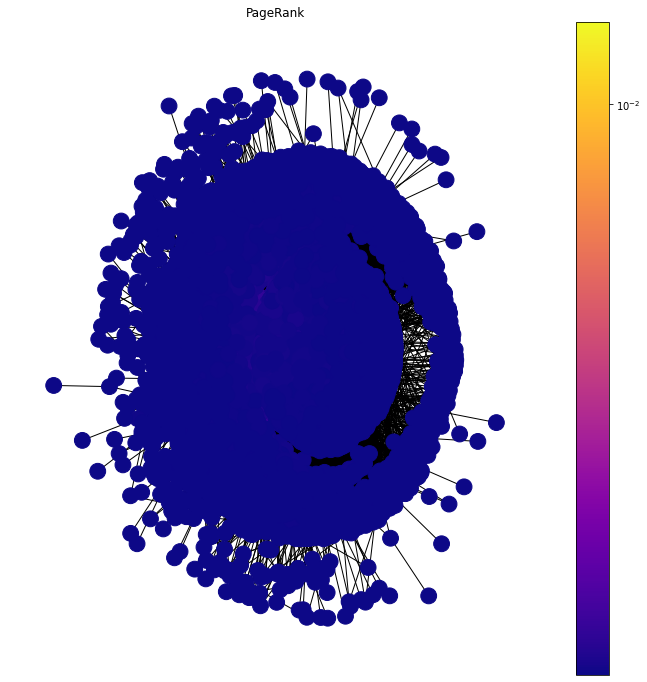

In [28]:
plt.figure(figsize=(12,12))
#pos = nx.kamada_kawai_layout(graph)
draw(graph, pos, pager, 'PageRank')

{'gronkh': '#3173a1', 'rocketbeanstv': '#e0802c', 'royalphunk': '#3a913a', 'moondye7': '#c03c3d', 'laraloft': '#9371b2', '8803': '#835b53', 'shlorox': '#d584bc', 'staiy': '#7f7f7f', 'thiseguy': '#a8a935', 'lost': '#2dabb8'}


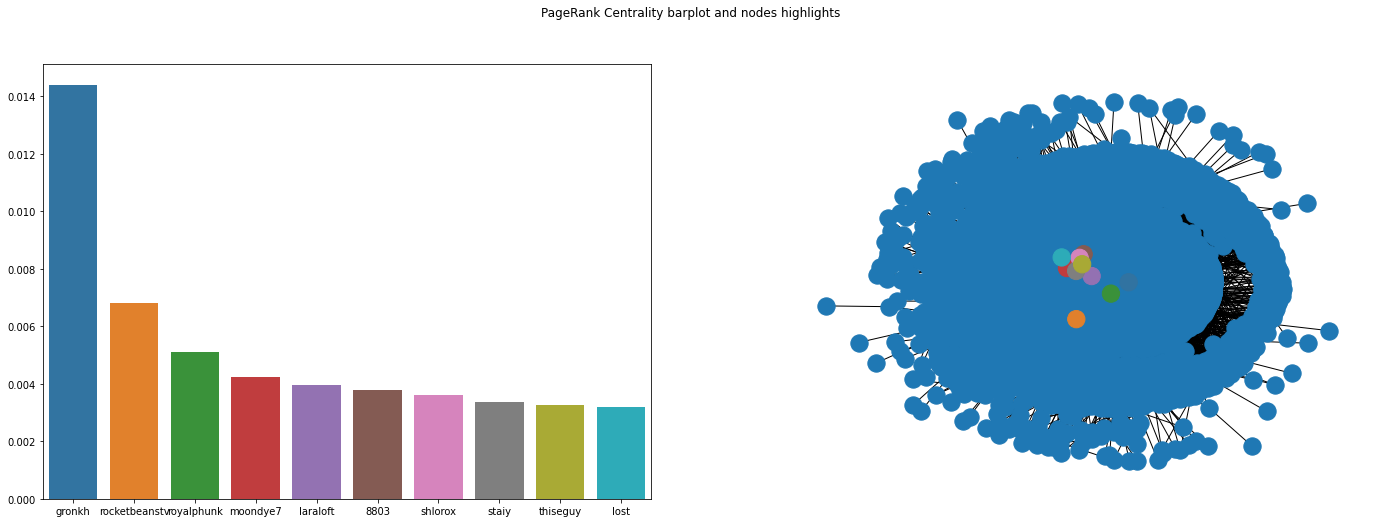

<Figure size 1080x720 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [29]:
dizionario_colori = barplot_nodes(graph, pager, "PageRank", pos)

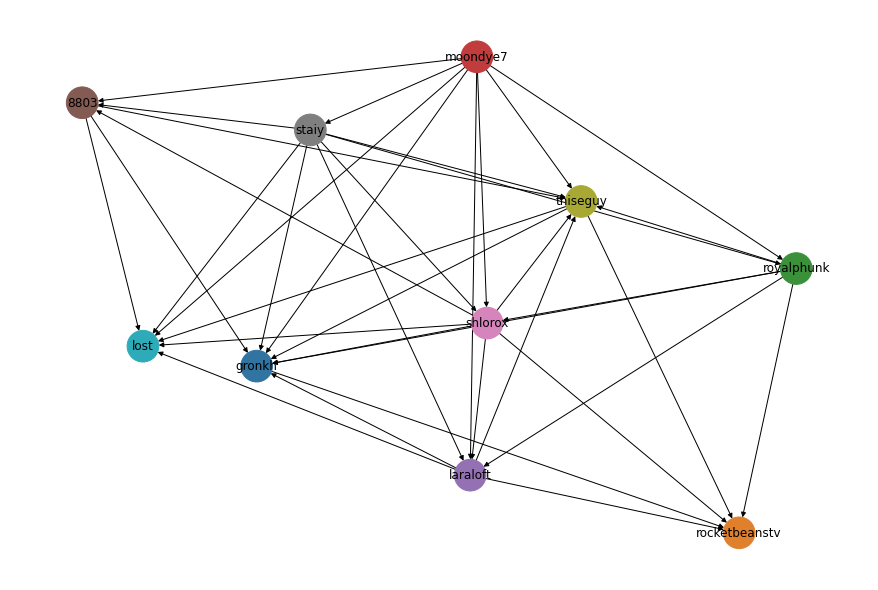

In [30]:
important_node_centrality_plot(pager, df_edge, dizionario_colori)

### Analisi delle strutture

Communites

In [31]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)

In [32]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.kamada_kawai_layout(graph)
    return graph

def visualizza(graph,dizionario,k):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14, 6))
    fig.suptitle('Community '+str(k+1))
    colors = sns.color_palette('pastel')[0:5]
    ax1.pie([dizionario["partner"],dizionario["not_partner"]], labels = ["Partner","Not Partner"], colors = ["#6441a5","#808080"], autopct='%.0f%%')
    pos = nx.kamada_kawai_layout(graph)
    nx.draw(graph, pos,ax=ax2,node_size=300,font_size=6)
    nx.\
       draw_networkx_nodes(graph, pos, nodelist=list(dizionario["colors"].keys()), node_color=list(dizionario["colors"].values()))\
       .set_edgecolor('k') 

In [44]:
import random

def visualizza_community(graph,dizionario, pos):
    #pos = nx.fruchterman_reingold_layout(graph)
    plt.figure(figsize=(12,8))    
    nx.draw(graph, pos,node_size=300,font_size=6)
    nx.\
       draw_networkx_nodes(graph, pos, nodelist=list(dizionario.keys()), node_color=list(dizionario.values()))\
       .set_edgecolor('k') 
    plt.show()

colors_communities = []
dic_colors={}
r = lambda: random.randint(0,255)
for c in communities:
    color = '#%02X%02X%02X' % (r(),r(),r())
    for el in c:
        dic_colors[el]=color

visualizza_community(grafo(graph.nodes, graph.edges),dic_colors, pos)

In [33]:
dictionary = {}
k=0
partner_color="#6441a5"
not_partner_color="#808080"
for c in communities:
    partner = 0
    not_partner = 0
    supp_dic={}
    supp_dic_2 = {}
    supp_list=[]
    views = []
    total_views=0
    for el in c:
        node = df_target[df_target["username"]==el]
        total_views += int(node["views"])
        views.append(int(node["views"]))
        if node["partner"].bool(): 
            supp_dic[el]=partner_color
            partner+=1
        else:
            supp_dic[el]=not_partner_color
            not_partner+=1
    supp_dic_2["colors"] = supp_dic
    supp_dic_2["partner"] = partner
    supp_dic_2["not_partner"] = not_partner
    supp_dic_2["mean_views"] = round(total_views/len(c),2)
    supp_dic_2["dev_standard_views"] = np.std(views)
    print(supp_dic_2["dev_standard_views"])
    dictionary[k] = supp_dic_2
    k+=1



2379784.3270852035
726822.0691257872
498576.9044865838
47996.84031473684
101687.08775221901
21999.22678845647
68455.03880706218
86546.48252714965
5361.355522626717
3453.0356282552316
9727.442851926708
9114.665500582016
2557.300665521665
22404.471527089478
2060.7994287931774
5226.040239352672
29226.881886468072
1040.8105687395762
7561.921158012691
4651.867908700762
4796.487531517204
3803.3297727123268
1566.6807460360264
4941.505414344903
3275.07629682119
2702.5644303142894
29506.184982982806
18418.07667754698
721.7396951117487
4547.247876463301
6733.694319428229
4492.308704886609
27077.8658727423
8035.843757122764
1797.1562721885557
2063.5207777000937
16917.98381079206
72299.51456883296
462878.7014333957
1588.4991518900963
8438.156288879436
3755.3983366171246
1322.2446403328277
605.937473855366
86.0
5658.5
2435.0
9353.5
502.5
108.5
5795.0
1038.0
4257.5
4197.5
112.0
13003.0
7182.0
7654.0
5020.0
125136.0
1639.5
22.0
7015.5
674.5
255.0
1352.0
4297.5
2607.5
1934.0


C:\Users\mat98\AppData\Local\Temp\ipykernel_215308\1569778765.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14, 6))


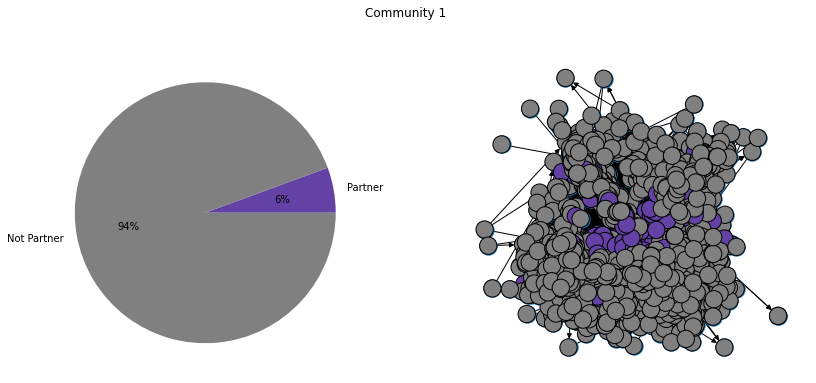

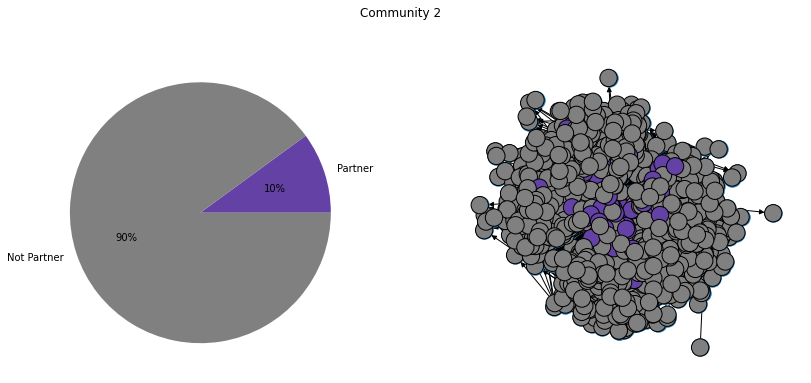

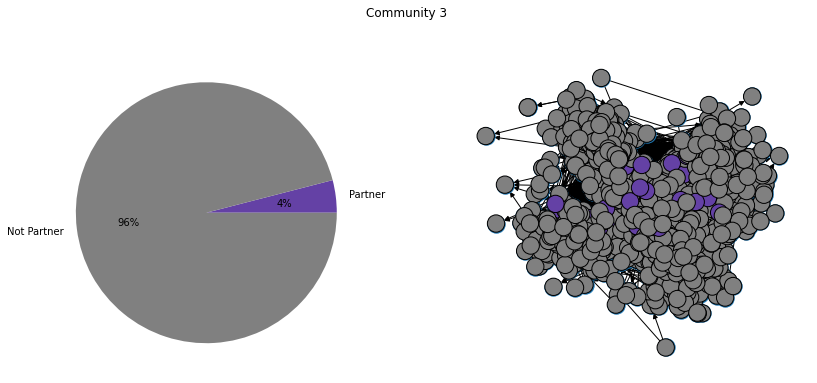

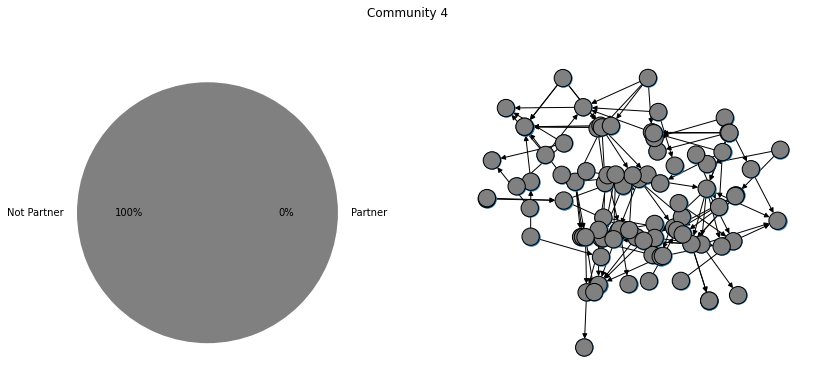

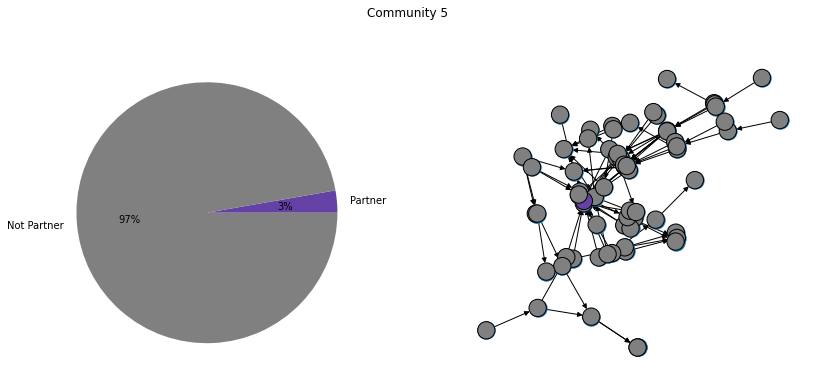

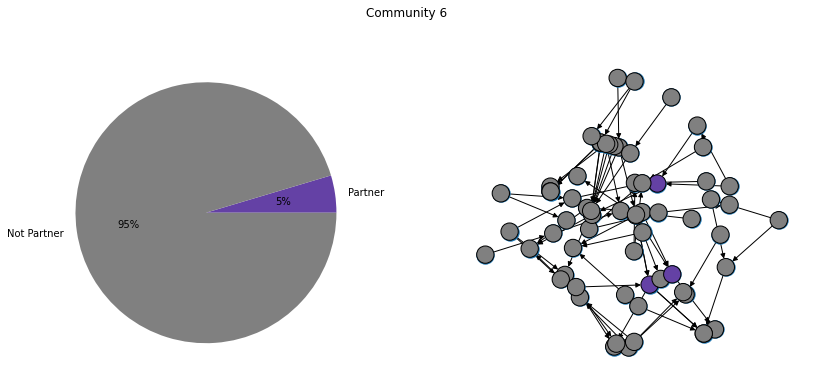

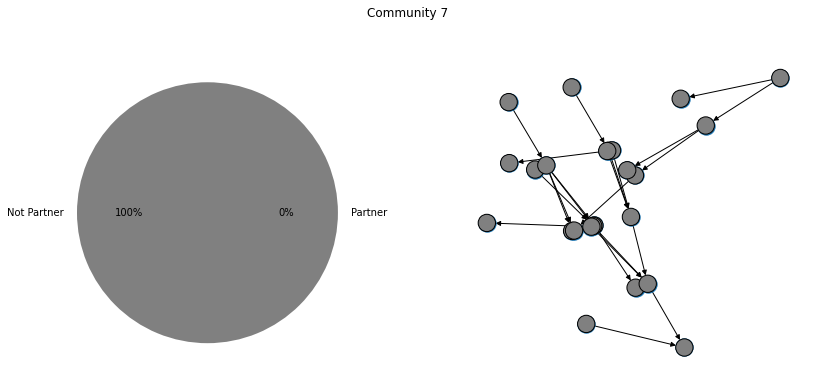

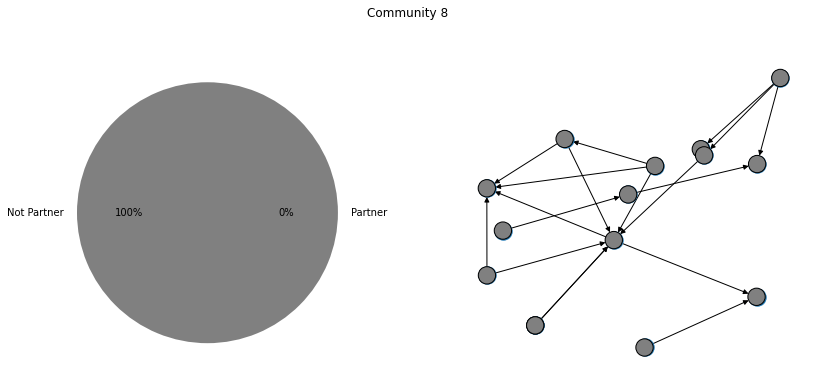

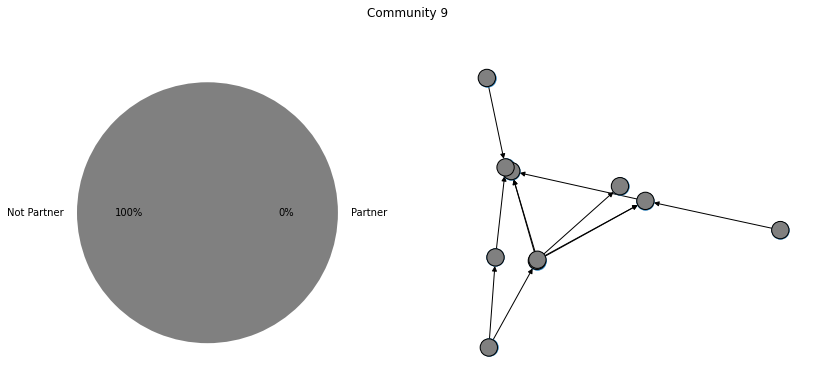

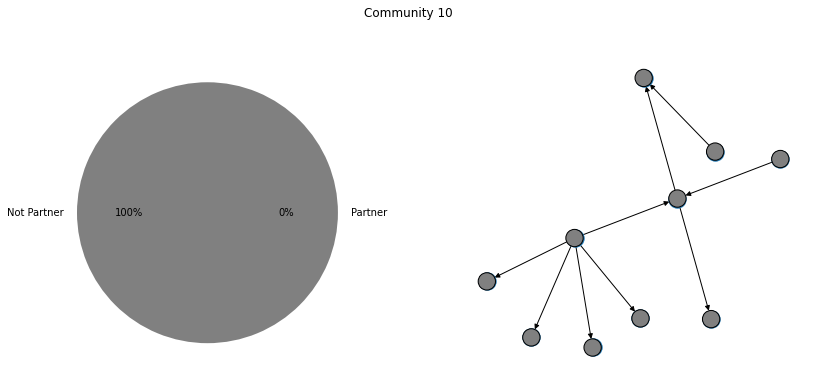

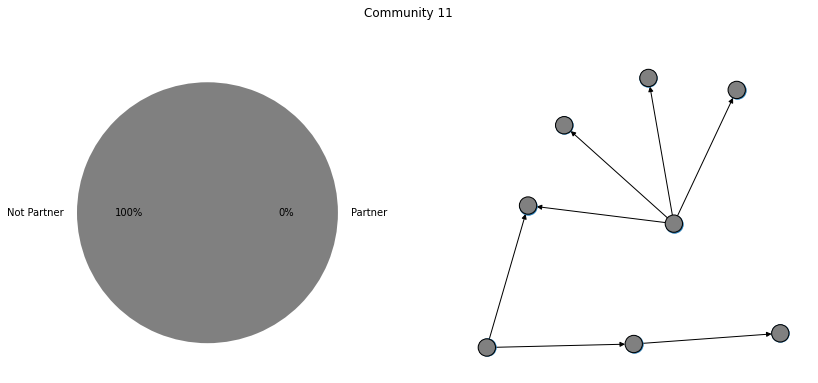

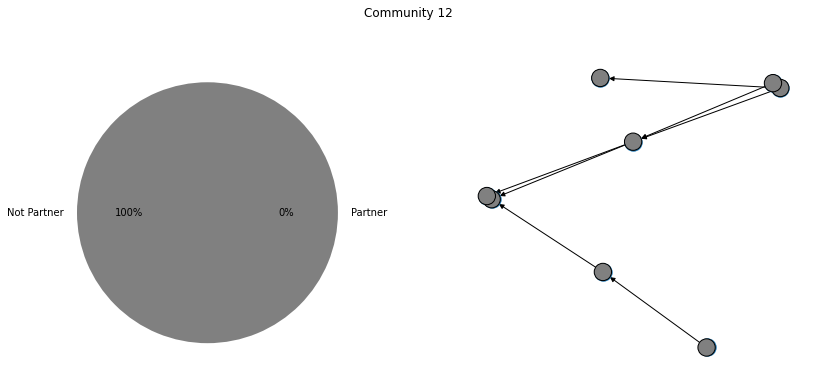

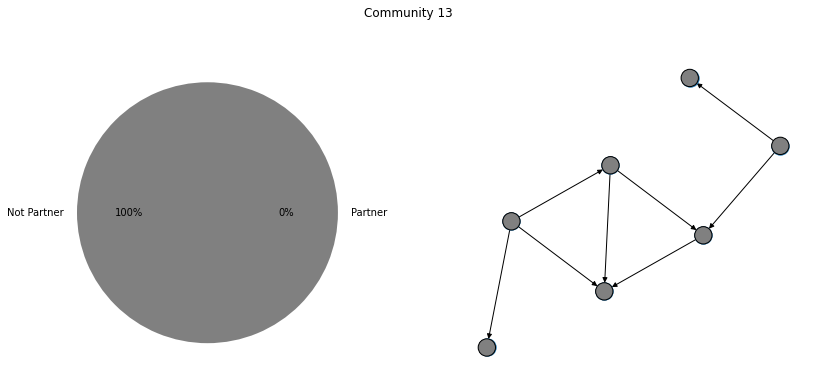

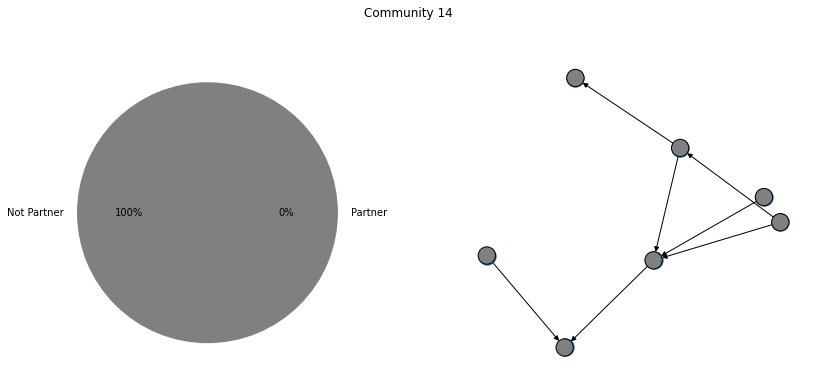

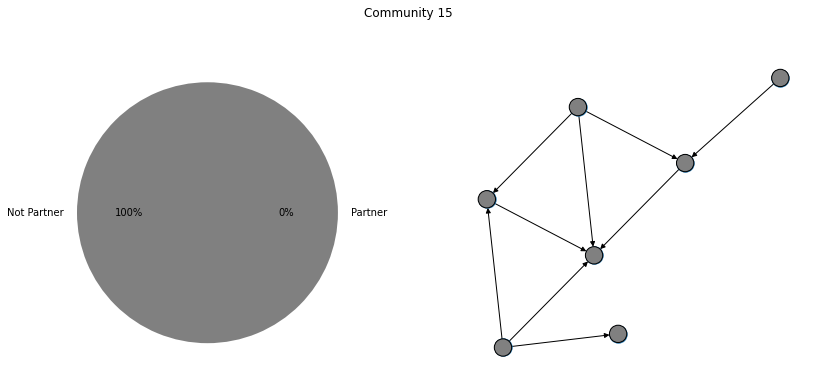

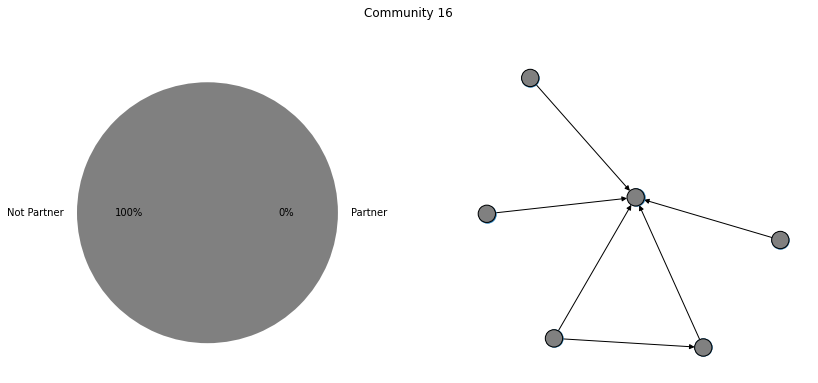

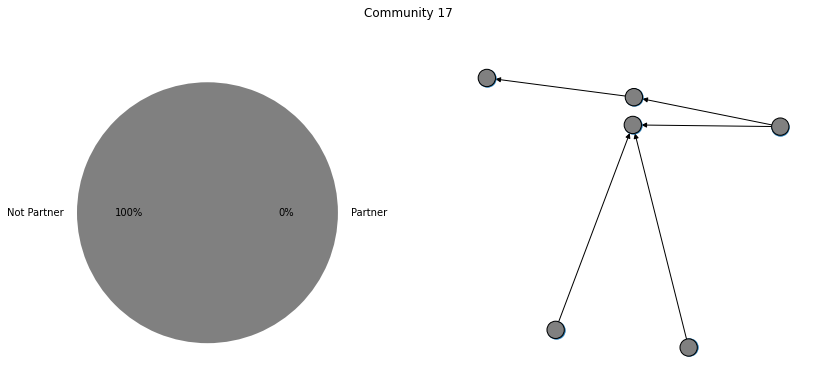

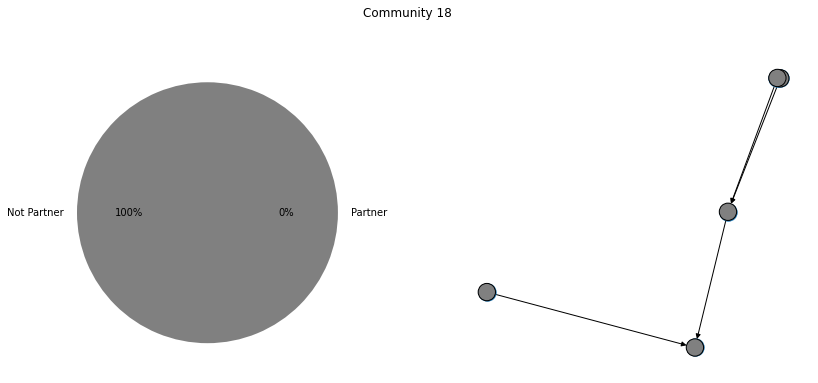

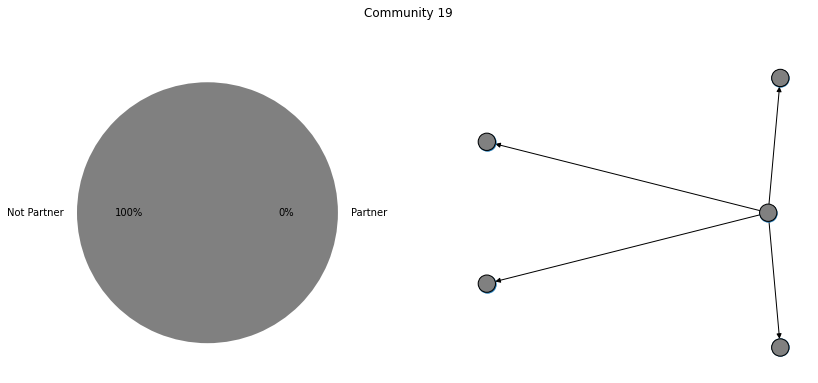

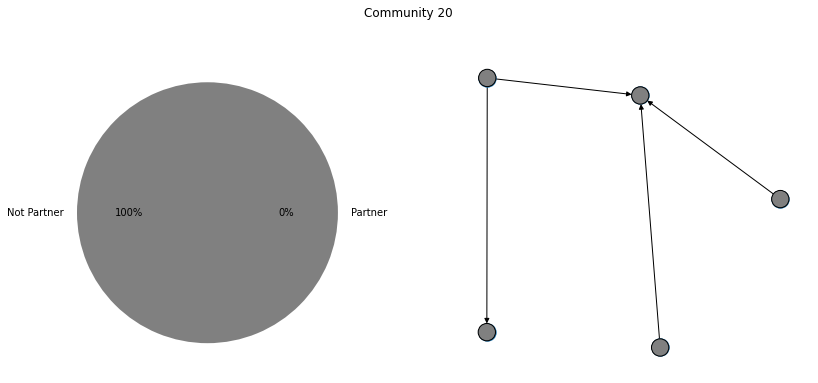

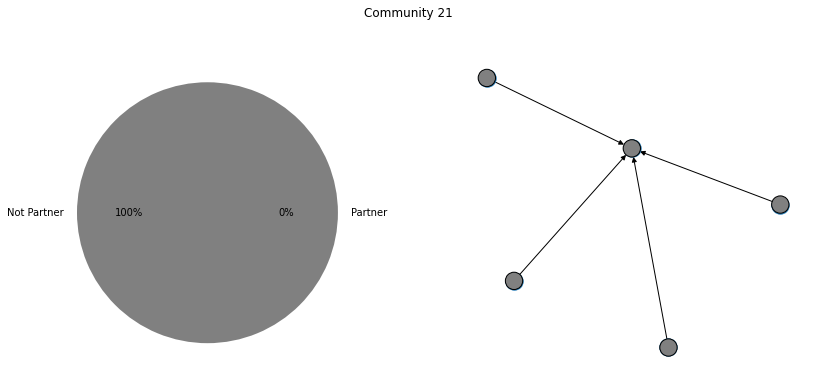

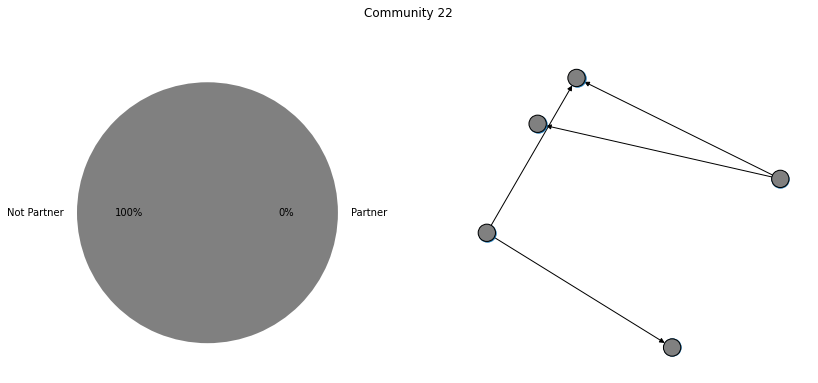

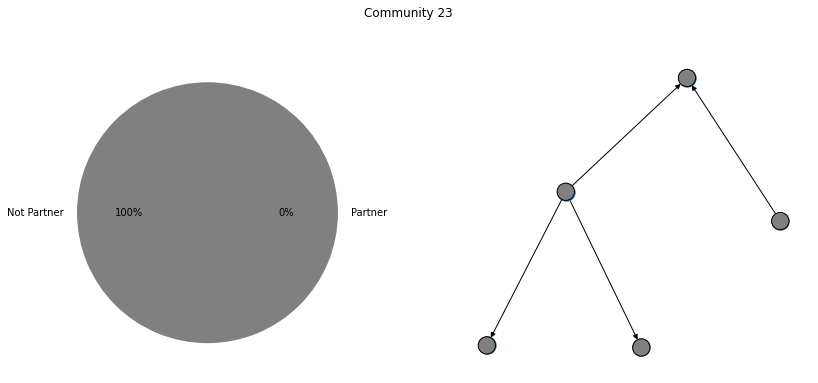

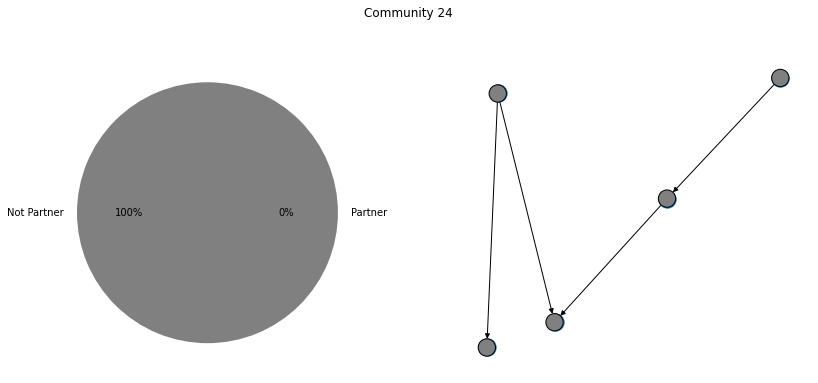

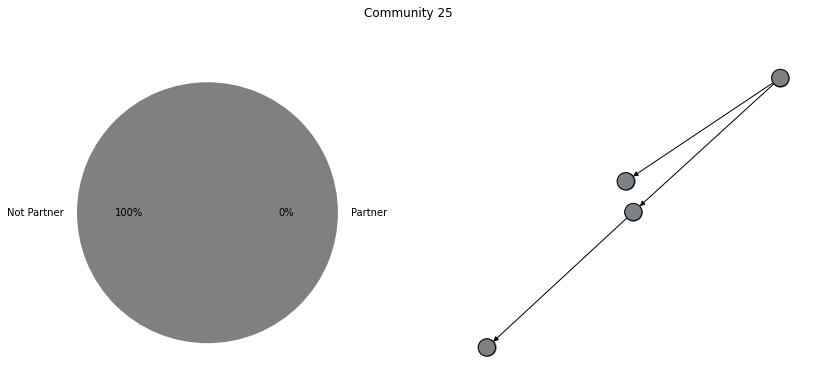

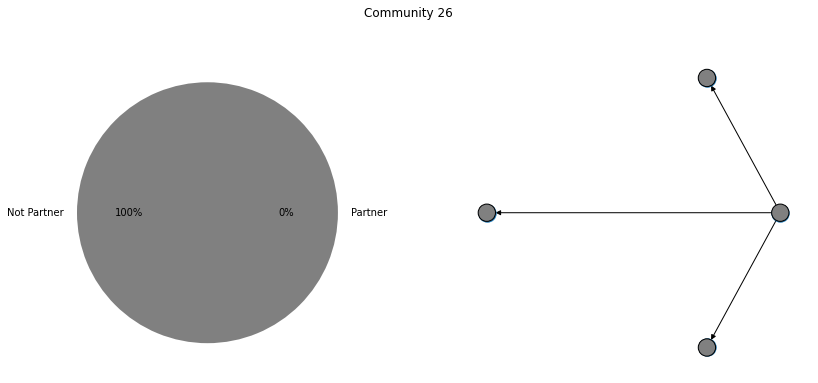

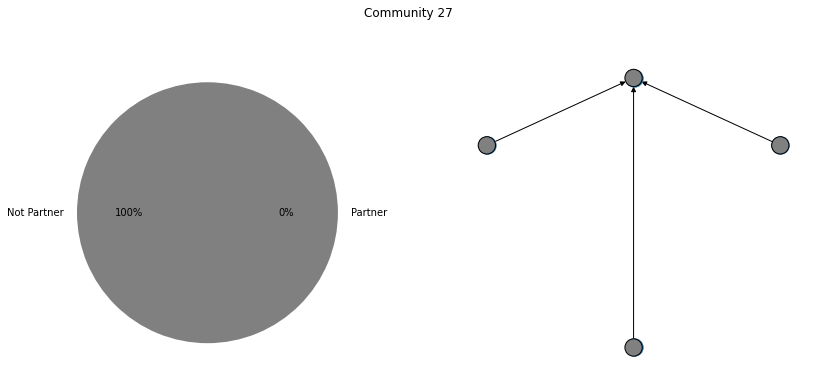

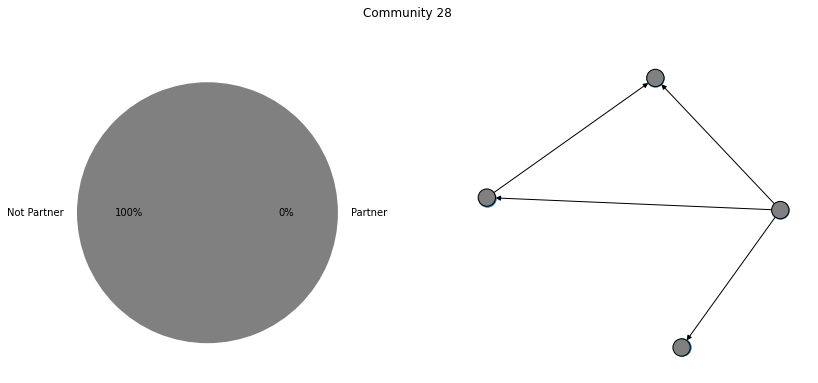

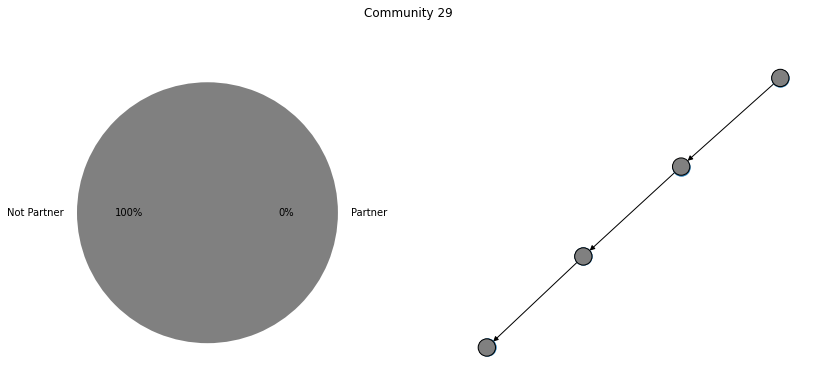

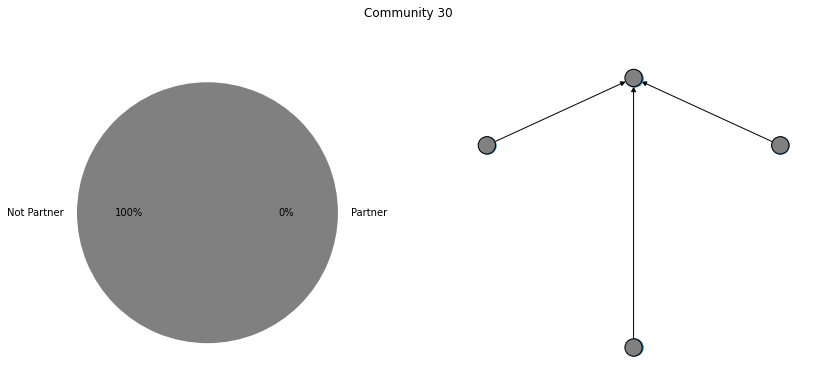

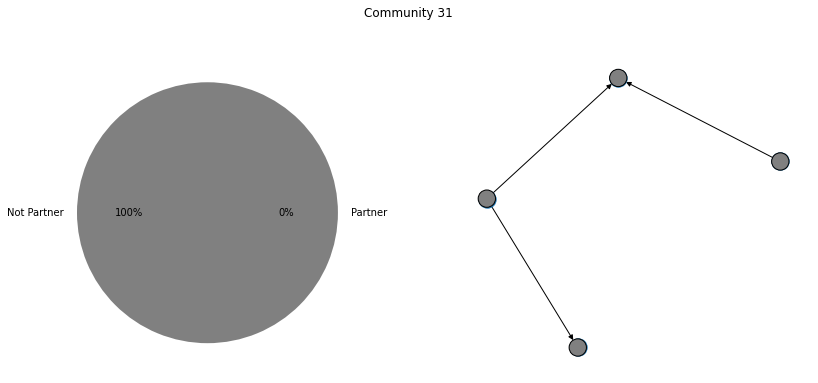

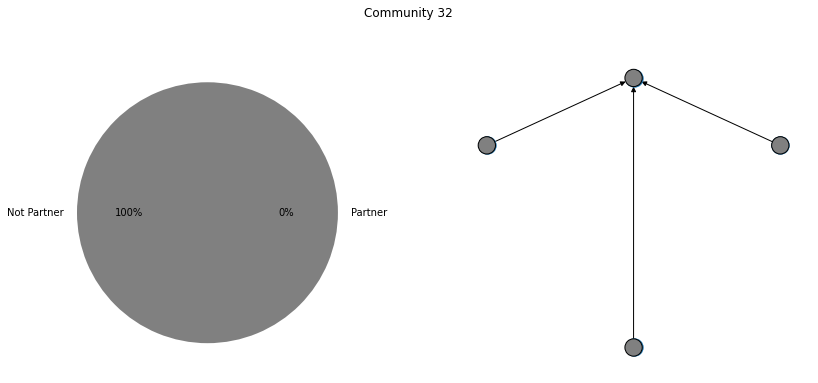

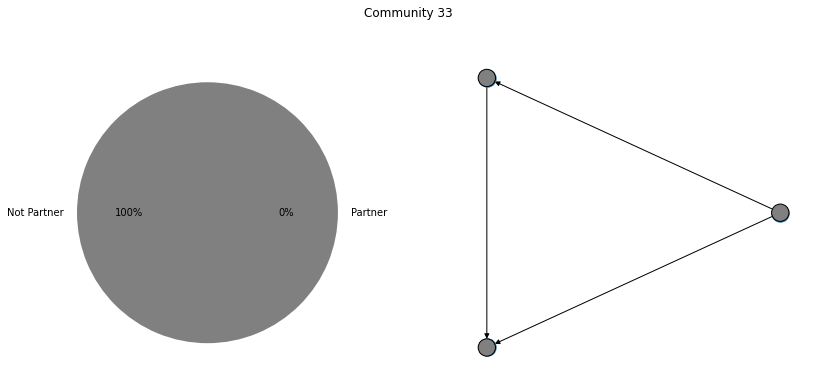

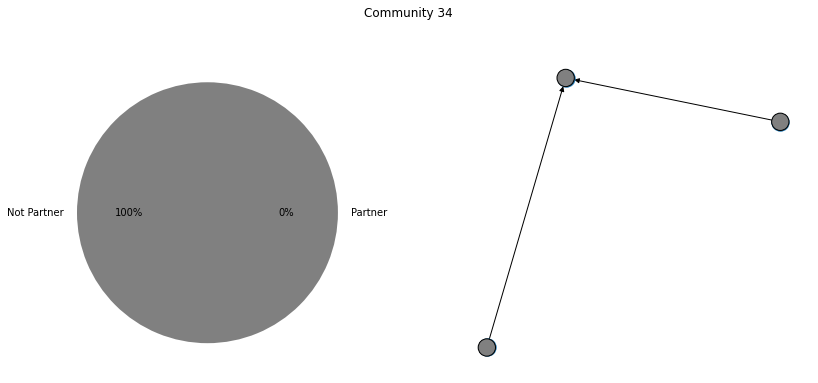

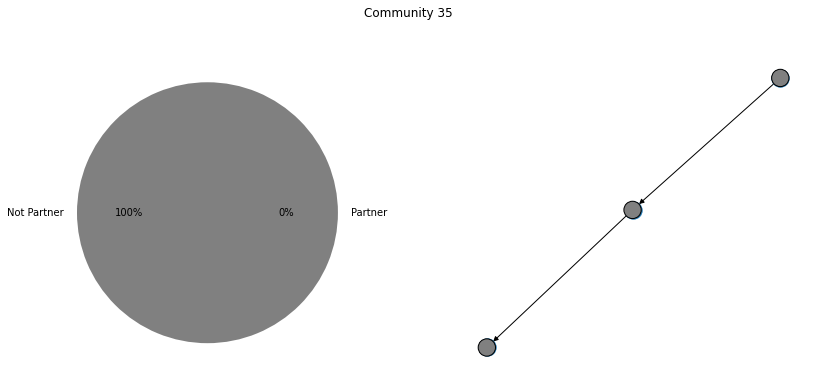

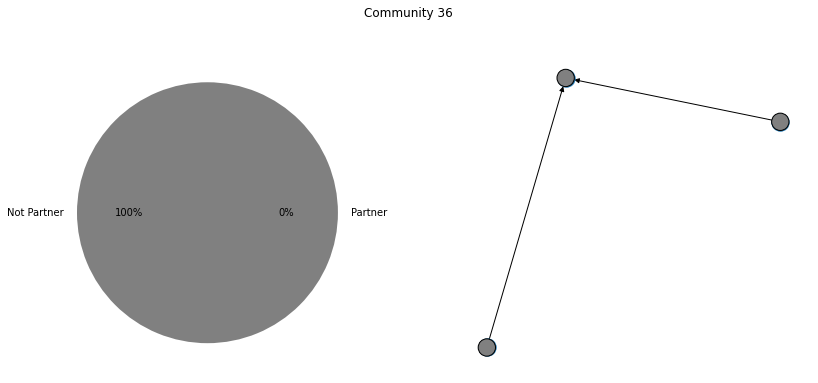

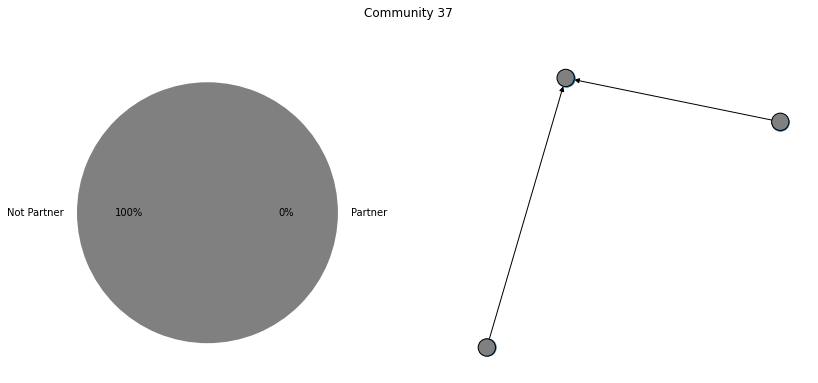

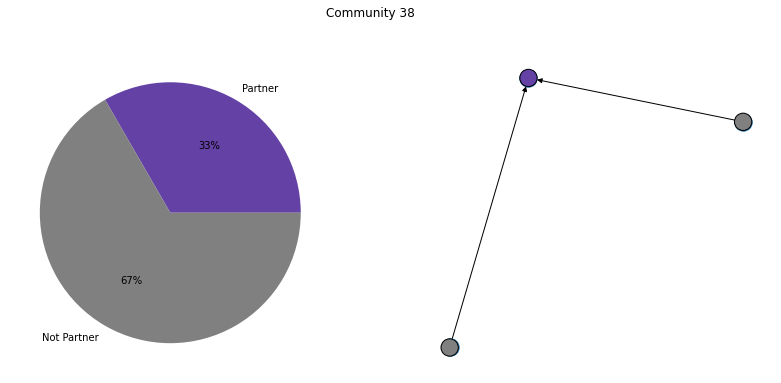

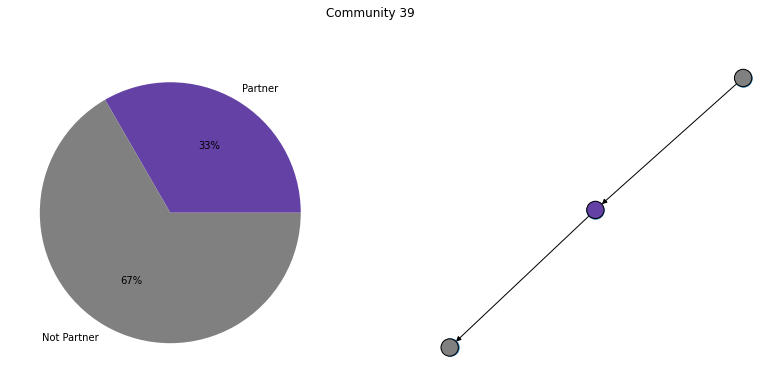

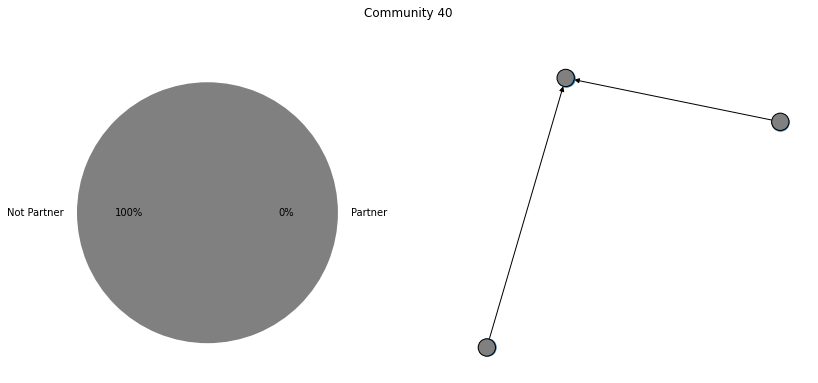

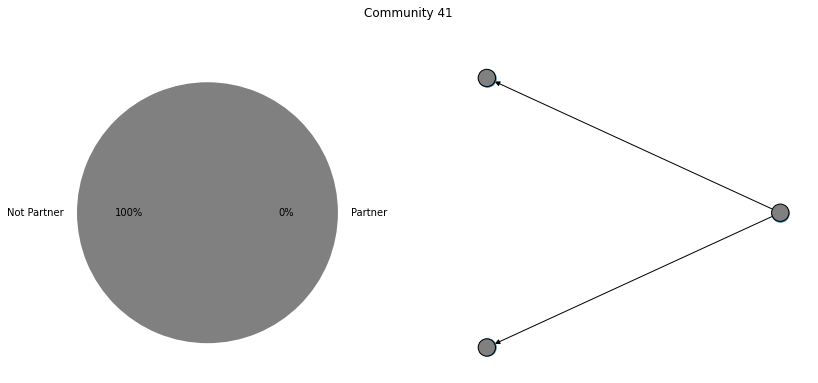

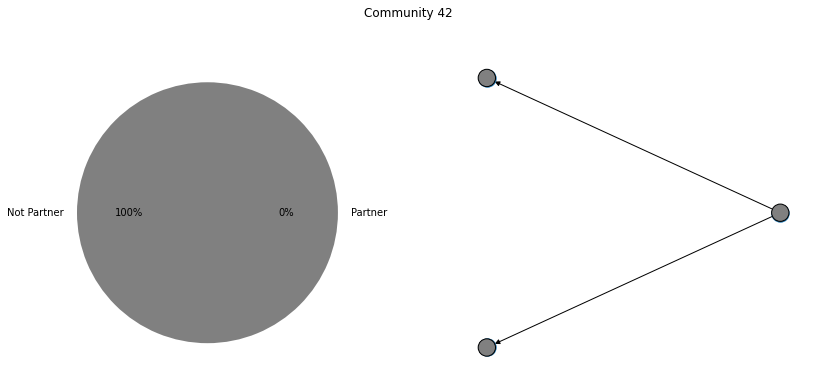

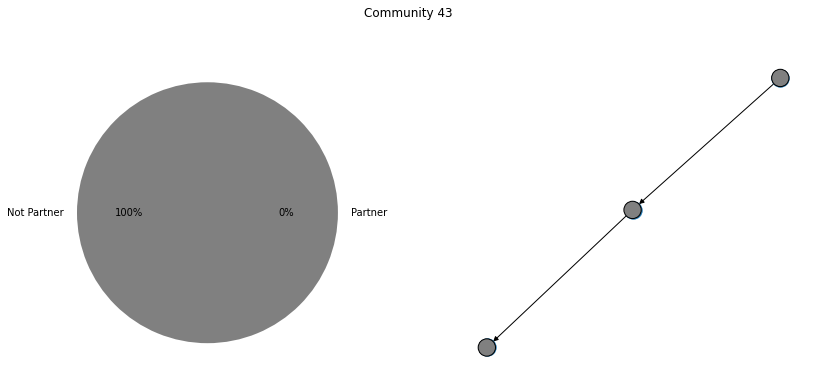

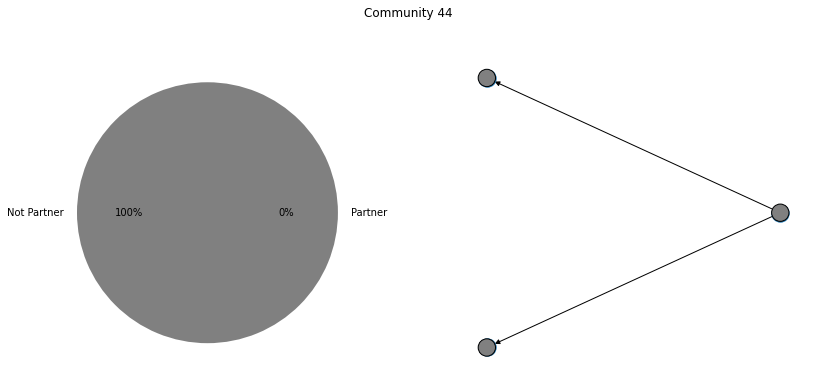

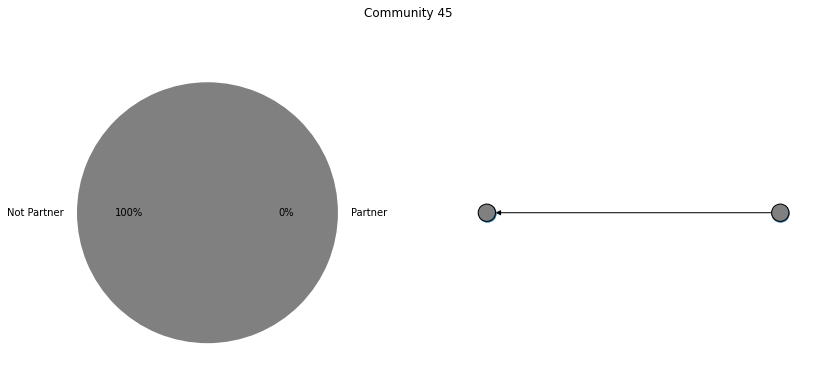

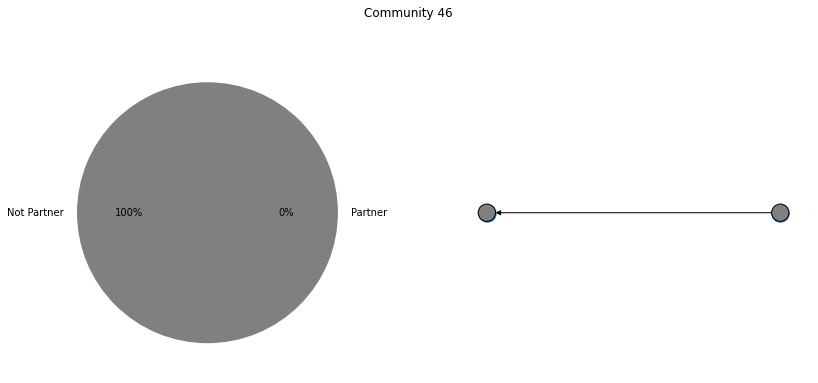

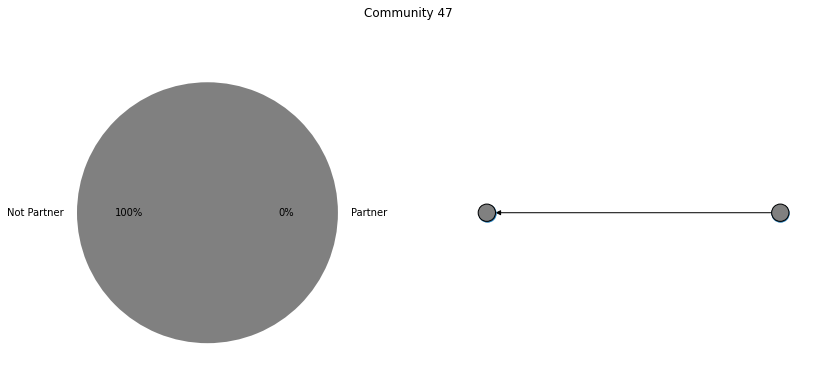

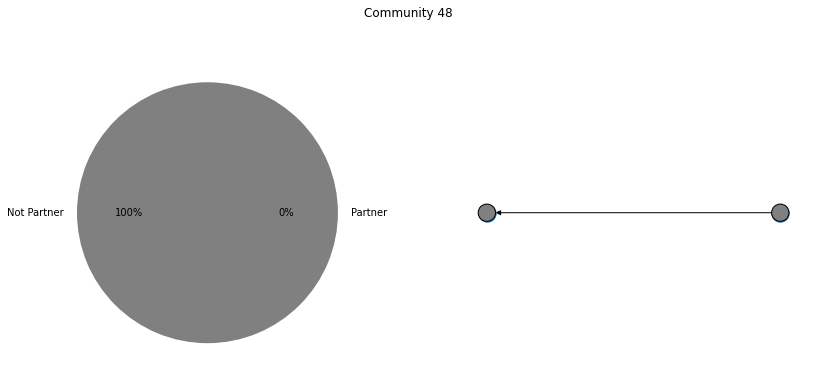

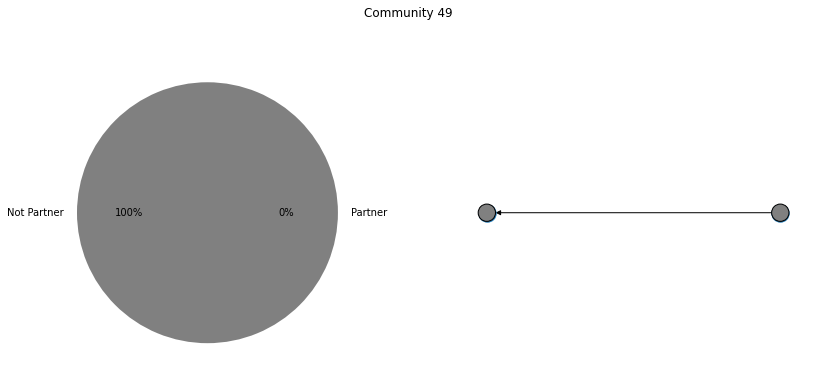

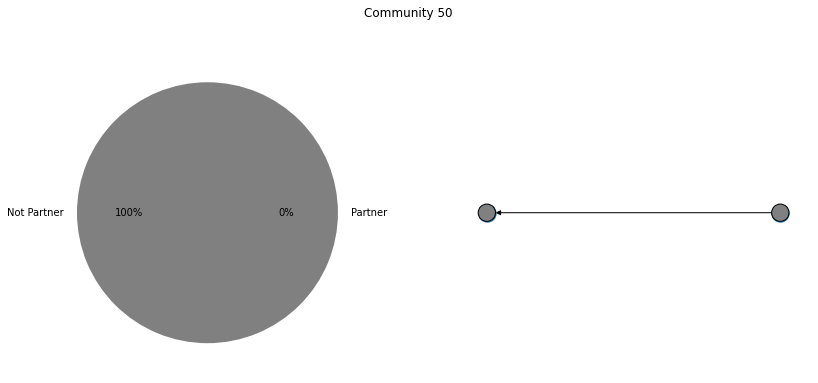

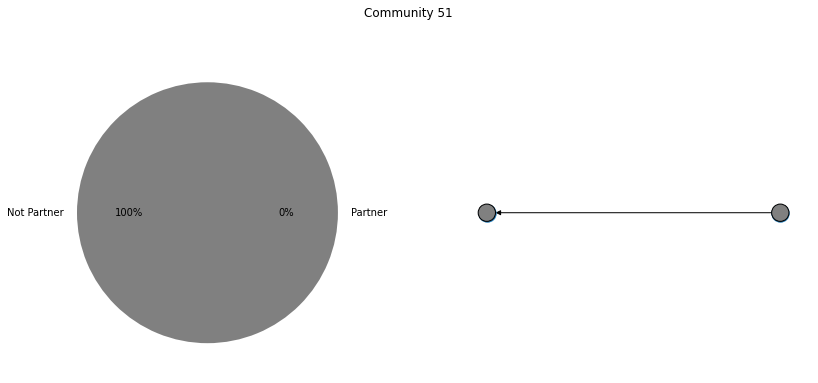

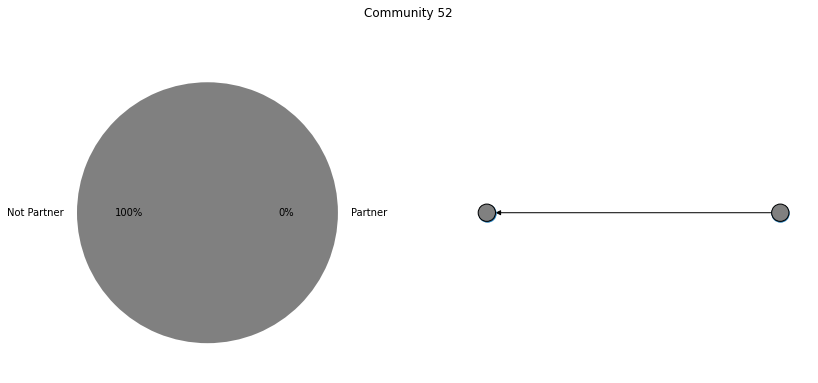

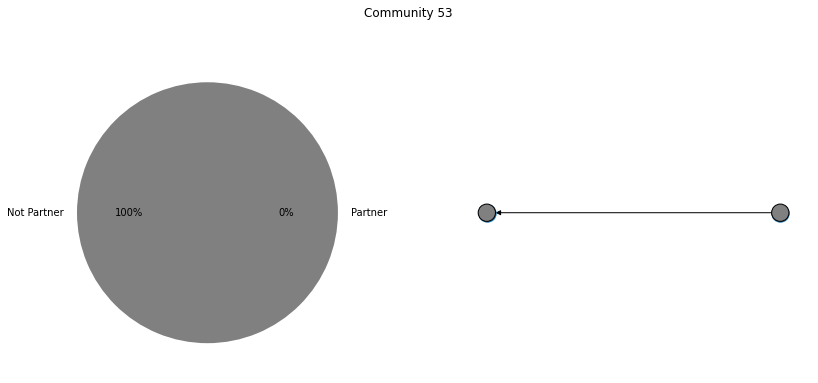

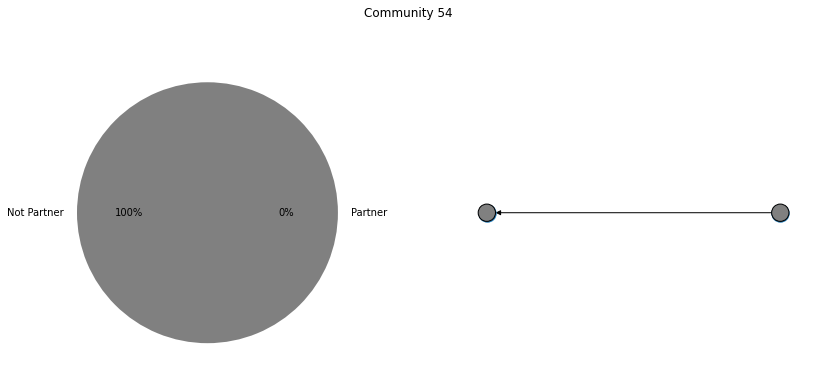

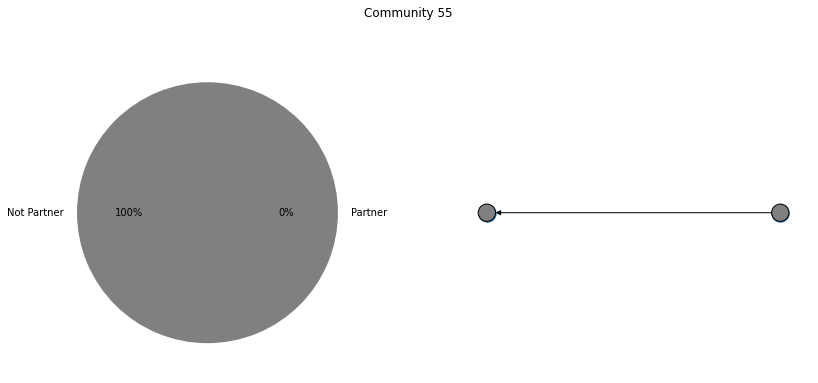

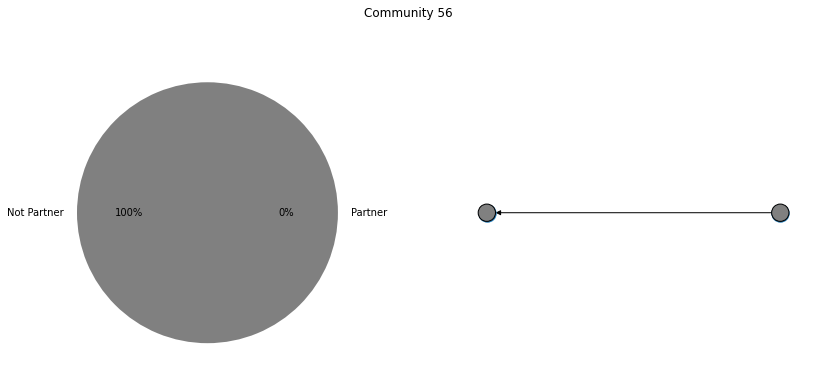

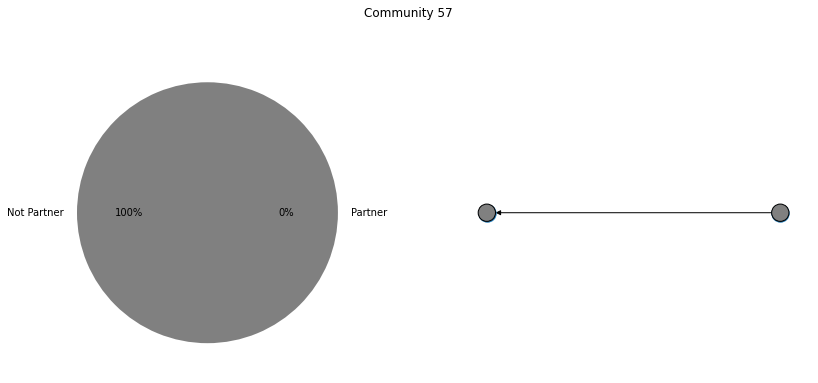

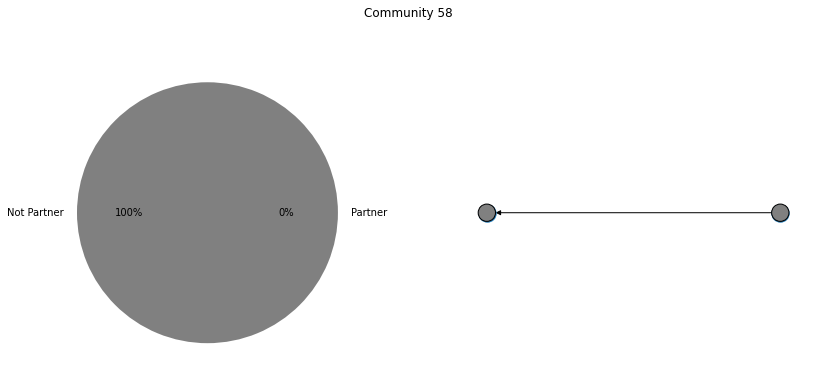

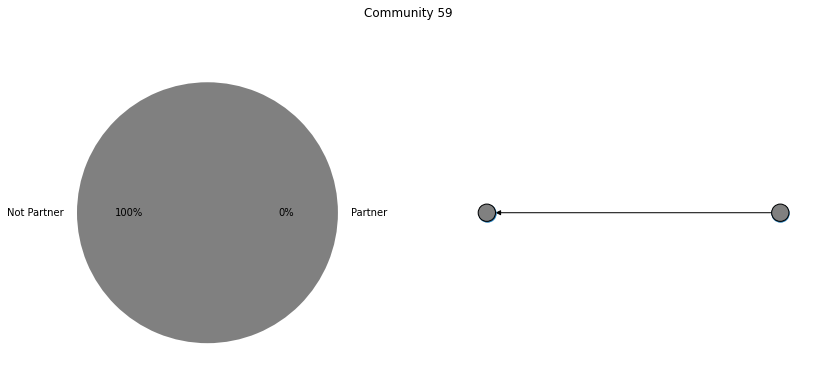

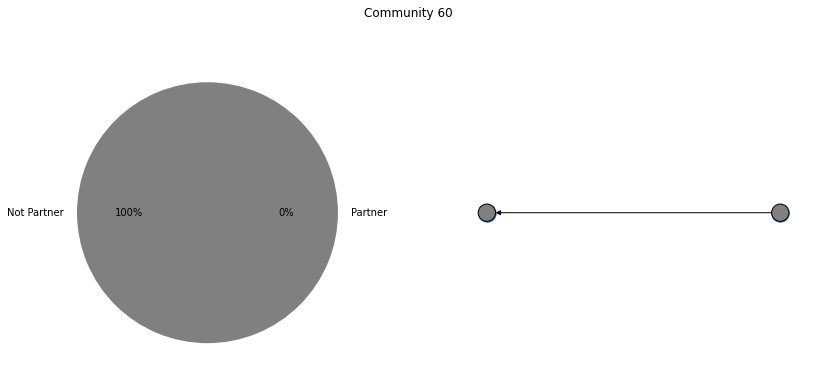

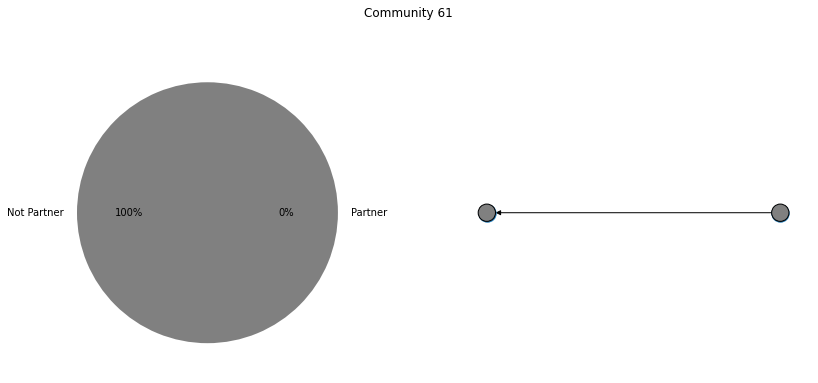

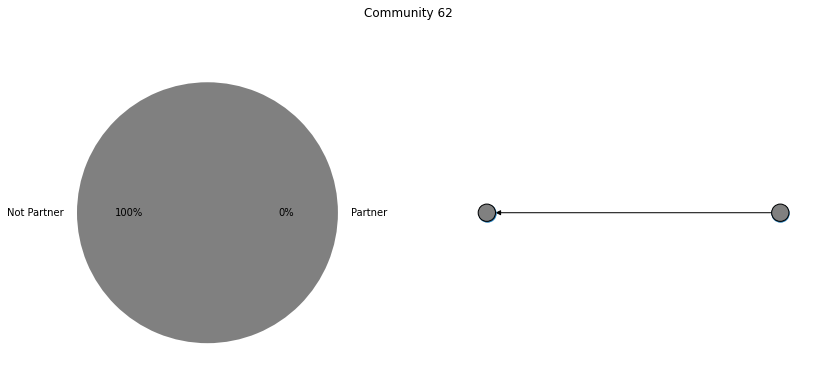

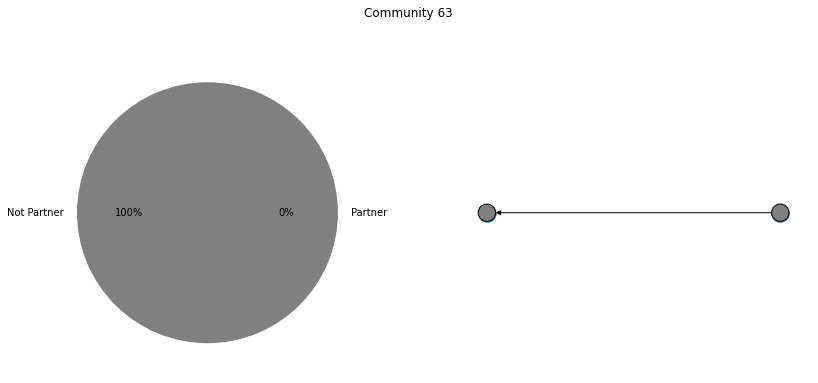

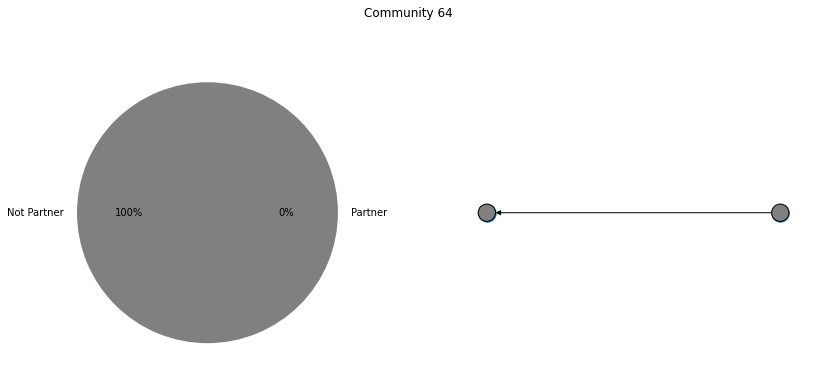

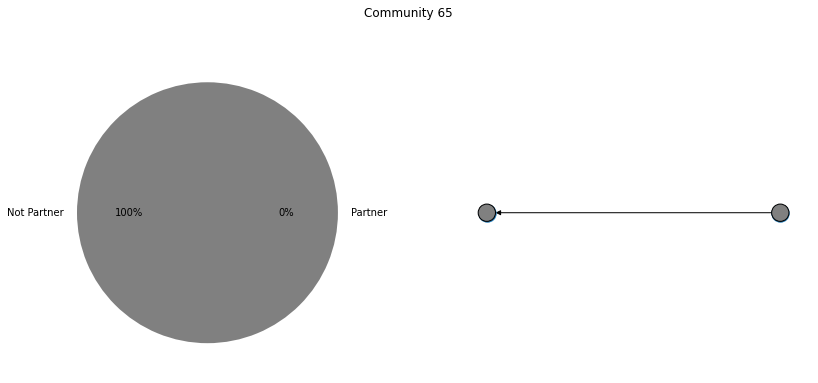

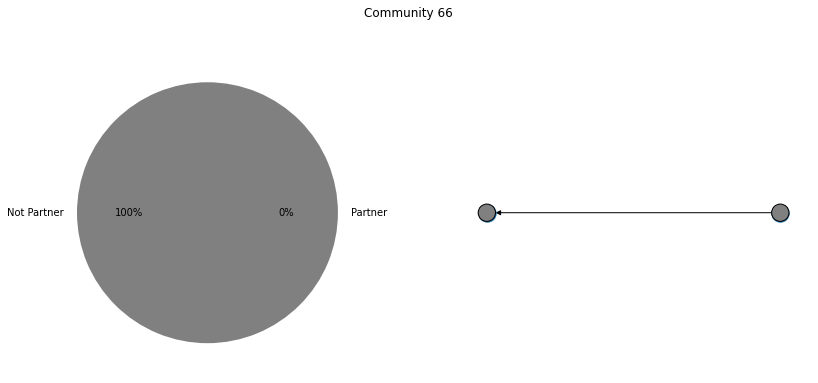

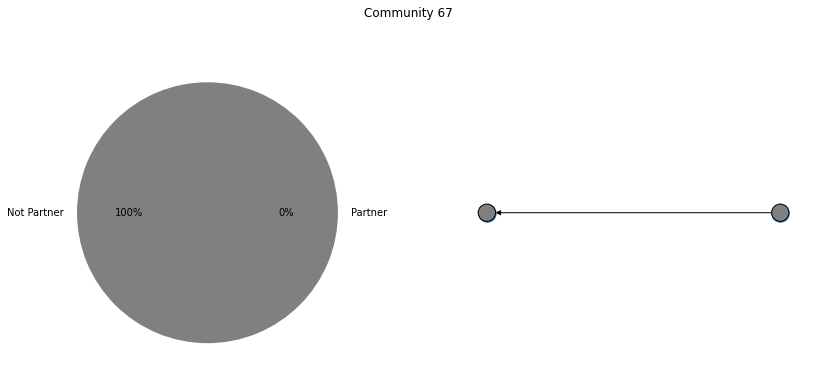

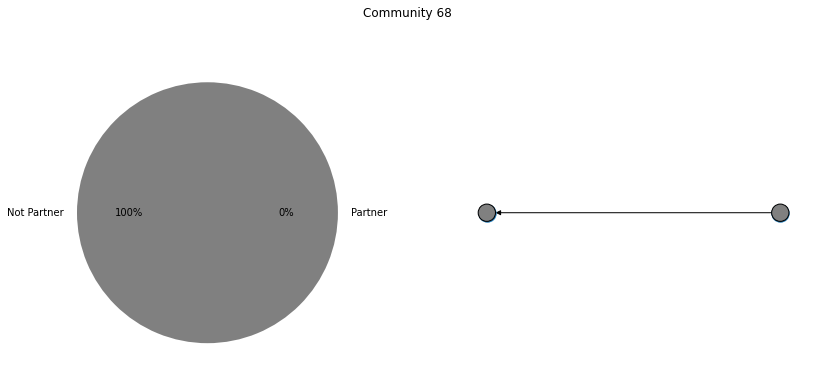

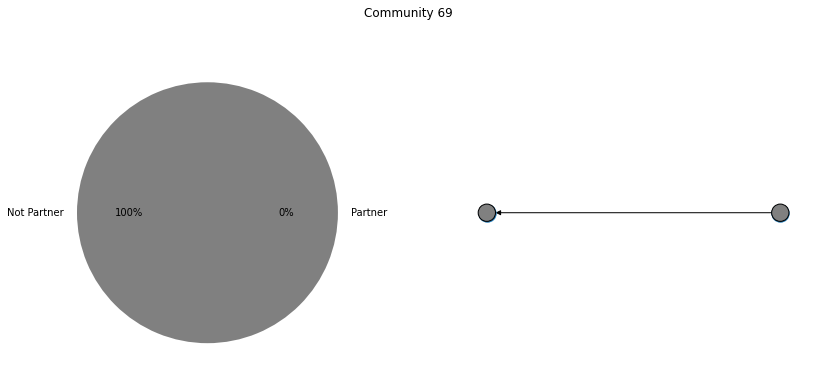

In [34]:
k=0
mean_views = []
dev_standard_views = []
list_communites = []
for c in communities:
    if len(c) == 1:
        continue
    edges = caricamento(c)
    visualizza(grafo(c, edges),dictionary[k],k)
    mean_views.append(dictionary[k]["mean_views"])
    dev_standard_views.append(dictionary[k]["dev_standard_views"])
    list_communites.append("Community "+str(k+1))
    k+=1

[2379784.3270852035, 726822.0691257872, 498576.9044865838, 47996.84031473684, 101687.08775221901, 21999.22678845647, 68455.03880706218, 86546.48252714965, 5361.355522626717, 3453.0356282552316, 9727.442851926708, 9114.665500582016, 2557.300665521665, 22404.471527089478, 2060.7994287931774, 5226.040239352672, 29226.881886468072, 1040.8105687395762, 7561.921158012691, 4651.867908700762, 4796.487531517204, 3803.3297727123268, 1566.6807460360264, 4941.505414344903, 3275.07629682119, 2702.5644303142894, 29506.184982982806, 18418.07667754698, 721.7396951117487, 4547.247876463301, 6733.694319428229, 4492.308704886609, 27077.8658727423, 8035.843757122764, 1797.1562721885557, 2063.5207777000937, 16917.98381079206, 72299.51456883296, 462878.7014333957, 1588.4991518900963, 8438.156288879436, 3755.3983366171246, 1322.2446403328277, 605.937473855366, 86.0, 5658.5, 2435.0, 9353.5, 502.5, 108.5, 5795.0, 1038.0, 4257.5, 4197.5, 112.0, 13003.0, 7182.0, 7654.0, 5020.0, 125136.0, 1639.5, 22.0, 7015.5, 67

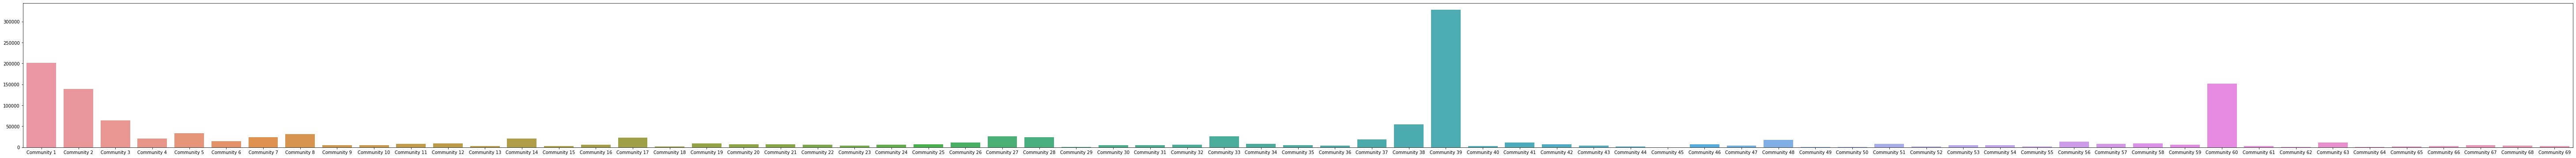

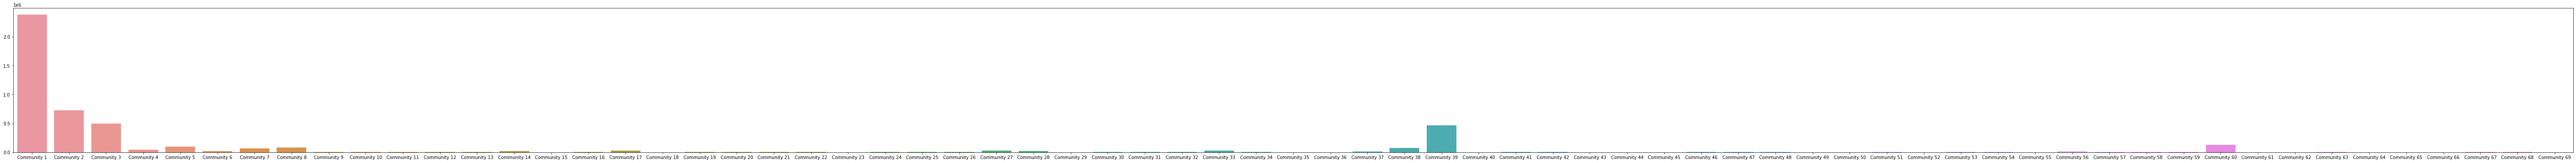

In [35]:
plt.figure(figsize=(len(communities)*1.5, 6))
sns.barplot(x=list_communites,y= mean_views)
plt.figure(figsize=(len(communities)*1.5, 6))
sns.barplot(x=list_communites,y= dev_standard_views)
print(dev_standard_views)

Triadi

In [36]:
'''
def trova_triadi(grafo):
  triadi = {}
  for nodes in combinations(grafo.nodes, 3):
    n_edges = grafo.subgraph(nodes).number_of_edges()
    triadi.setdefault(n_edges, []).append(nodes)
  return(triadi)
'''

'\ndef trova_triadi(grafo):\n  triadi = {}\n  for nodes in combinations(grafo.nodes, 3):\n    n_edges = grafo.subgraph(nodes).number_of_edges()\n    triadi.setdefault(n_edges, []).append(nodes)\n  return(triadi)\n'

In [37]:
'''
triadi = trova_triadi(graph)
print('Triadi del grafo totale: ' + str(len(triadi[1])))
'''

"\ntriadi = trova_triadi(graph)\nprint('Triadi del grafo totale: ' + str(len(triadi[1])))\n"

In [38]:
'''
count = 1
print('Triadi per community')
for community in communities:
    if len(community) == 1:
        continue
    edge = caricamento(community)
    community_graph = grafo(community,edge)
    triadi = trova_triadi(community_graph)
    if not 1 in triadi:
        continue
    print("Community " + str(count) + " : " + str(len(triadi[1])))
    count = count + 1
'''

'\ncount = 1\nprint(\'Triadi per community\')\nfor community in communities:\n    if len(community) == 1:\n        continue\n    edge = caricamento(community)\n    community_graph = grafo(community,edge)\n    triadi = trova_triadi(community_graph)\n    if not 1 in triadi:\n        continue\n    print("Community " + str(count) + " : " + str(len(triadi[1])))\n    count = count + 1\n'

Clique

In [39]:
#Codice per trovare le Clique
max = 0
max_clique = []
cliques = nx.find_cliques(graph.to_undirected())
for clique in cliques:
    if max < len(clique):
        max = len(clique)
        max_clique = clique
print(max)
print(max_clique)

19
['eyecident', 'thiseguy', 'shlorox', 'kittey', 'biberbros', 'salista_belladonna', 'maihopawango', 'fishc0p', 'minchennrw', 'wolverous', 'lost', 'sandcooltv', 'laraloft', 'dannyarcade', 'staiy', 'cirouss', 'cillidbaaang', 'areslps', 'thekraeuterbutter']


K-core

In [40]:
#Codice per trovare K-core
# Calcolo del k-core del grafo (nel caso specifico, k = 3)
k = 3
k_core = nx.k_core(graph, k)
print('k-core con k=3    len='+str(len(list(k_core.nodes()))))
print(list(k_core.nodes()))

k_core = nx.k_core(graph)
print('\nk-core: Main core    len='+str(len(list(k_core.nodes()))))
print(list(k_core.nodes()))

k-core con k=3    len=8557
['pinhead_01', 'rocketbeanstv', 'gronkh', 'pietsmiet', 'royalphunk', 'xpandorya', 'ungespielt', 'doktorfroid', 'syntonum', 'madbonzai', 'svenrge', 'hollyrockt', 'hubse', 'detrax', 'sulamith', 'rodneyger', 'gemmelrl', 'rankiku', 'voodooxgg', '5682', 'masterzwerg1', '7668', 'weichi_', 'codeincan0', 'nepmuck', 'king_kasy', 'solidoz', 'zauberkindtv', 'pabiohoh', 'digitalomon_development', 'motokosworld', 'einfach_yvan', 'shuzo_', 'panda_kitty', 'noflipnolife', 'therealkocher', 'captnblacky', 'knf_d34dp00l', 'atwa36', 'mcarnoldhat', 'benyootv', 'moondye7', 'flyinguwe87', 'miramisu', 'mastertay', 'stoke', 'powie', 'everizior', 'kernoelmediziner', 'lpmassive', 'wolfinchen', 'silentbenjitv', 'nvidiageforcede', 'nookyyy', 'eyecident', '8803', 'zonixxcs', 'shlorox', 'treiberthedriver', 'syrenia', 'yungjulian', 'lenavanille', 'shpendi', 'shurjoka', 'bibaboy', 'marcoopz', 'low3t', 'donacsgo', 'trilluxe', 'staiy', 'zek0tv', 'lory', '8747', 'chaosmiss', 'itcyberduelist', '

Ego Network

In [ ]:
#Ego network della rete completa
plt.figure(figsize=(18, 15))
node_and_degree = graph.degree()
(largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Crea l'ego network dal componente principale (largest hub)
hub_ego = nx.ego_graph(graph, largest_hub)

# Plotta i nodi attorno al nodo ego
pos = nx.kamada_kawai_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)

# Plotta il nodo ego (grande rosso)
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=1000, node_color='r')
plt.show()

NameError: name 'itemgetter' is not defined

<Figure size 1296x1080 with 0 Axes>

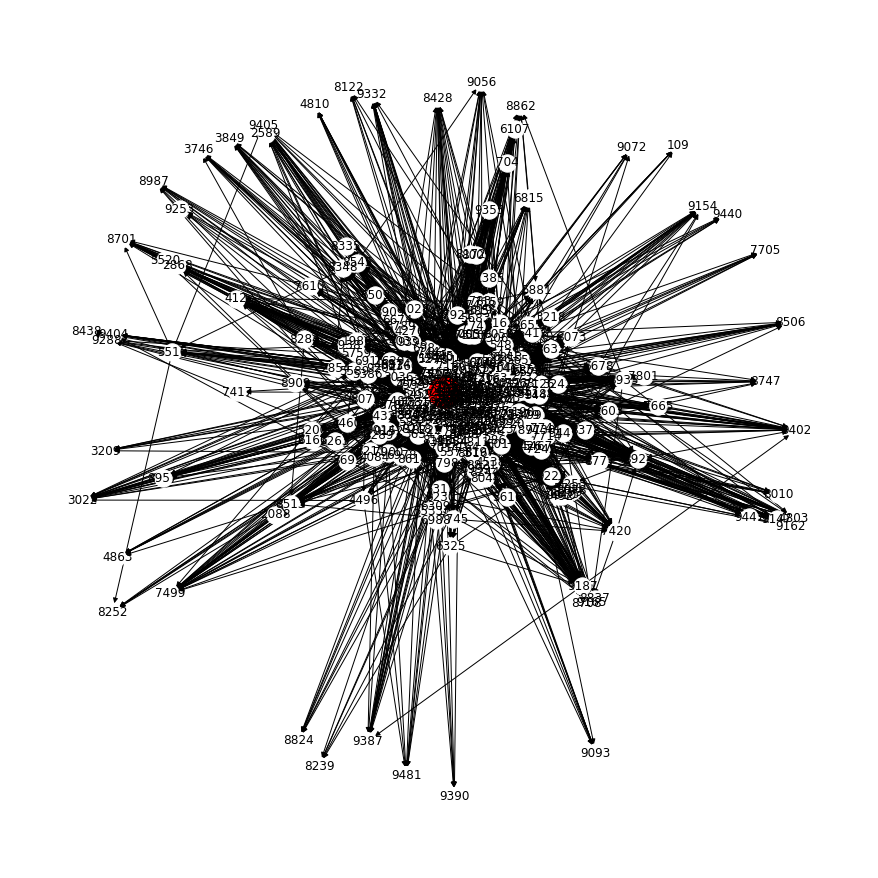

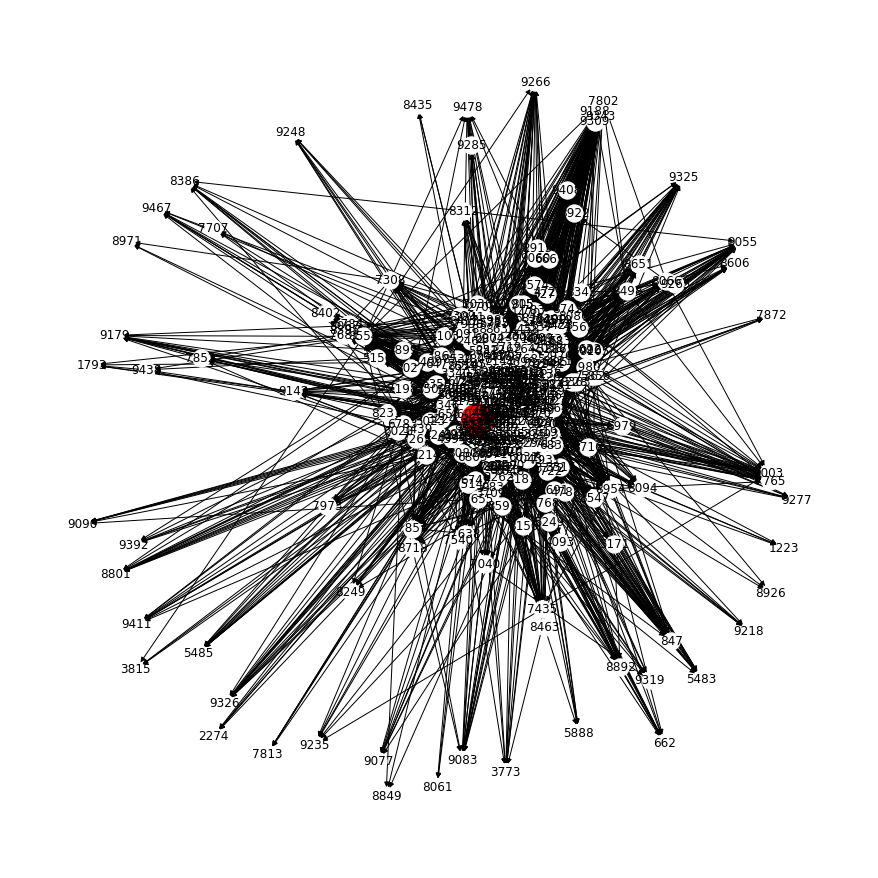

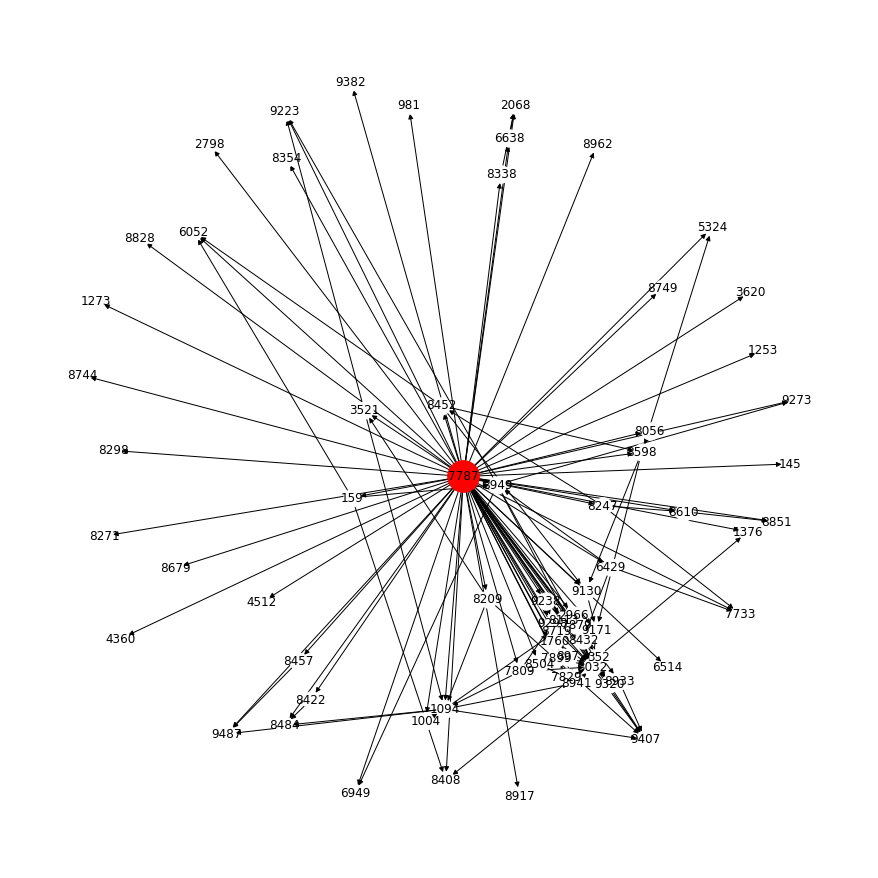

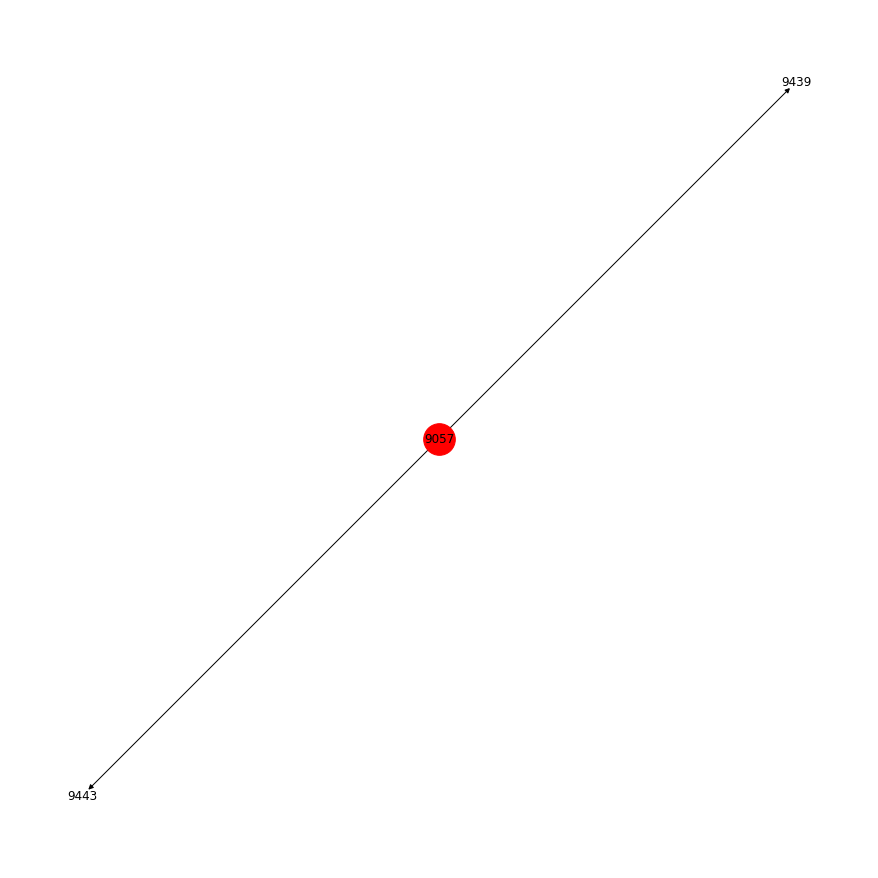

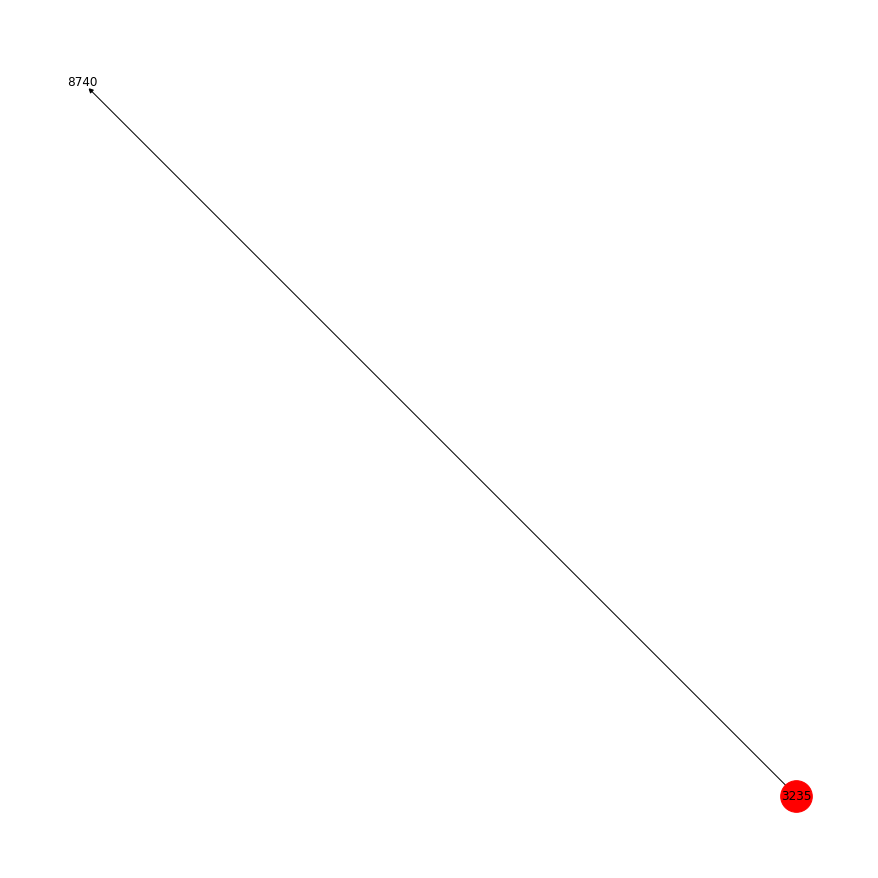

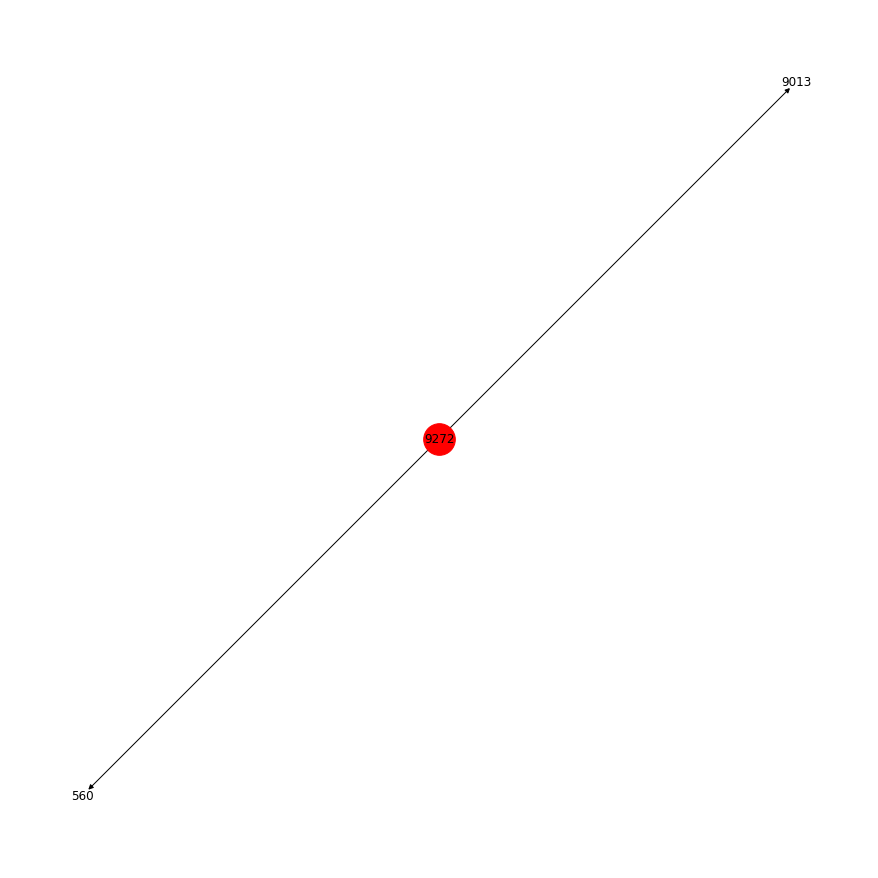

In [ ]:
#Ego network delle singole community
count = 1
for community in communities:
    if len(community) == 1:
        continue
    edge = caricamento(community)
    community_graph = grafo(community,edge)
    plt.figure(figsize=(12, 12))
    node_and_degree = community_graph.degree()
    (largest_hub, degree_hub) = sorted(node_and_degree, key=itemgetter(1))[-1]

    # Crea l'ego network dal componente principale (largest hub)
    hub_ego = nx.ego_graph(community_graph, largest_hub)

    # Plotta i nodi attorno al nodo ego
    pos = nx.kamada_kawai_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='w', node_size=300, with_labels=True)

    # Plotta il nodo ego (grande rosso)
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=1000, node_color='r')
    plt.show()